# Topik

## **Audit Risk Dataset for Classifying Fraudulent Firms**

### **Deskripsi Dataset**
Dataset ini bertujuan untuk membantu auditor dalam membangun model klasifikasi yang dapat memprediksi apakah suatu perusahaan melakukan kecurangan berdasarkan faktor risiko saat ini dan historis. Data ini mencakup berbagai sektor dengan jumlah perusahaan sebagai berikut:
*   Irrigation: 114
*   Public Health: 77
*   Buildings and Roads: 82
* Forest: 70
* Corporate: 47
* Animal Husbandry: 95
* Communication: 1
* Electrical: 4
* Land: 5
* Science and Technology: 3
* Tourism: 1
* Fisheries: 41
* Industries: 37
* Agriculture: 200



**Features Information**
: Berbagai faktor risiko dianalisis dari berbagai sumber, seperti catatan audit kantor sebelumnya, temuan audit, laporan kondisi lingkungan, ringkasan reputasi perusahaan, laporan masalah yang sedang berlangsung, catatan laba dan rugi, serta laporan tindak lanjut. Setelah berdiskusi secara mendalam dengan para auditor, kami mengidentifikasi faktor risiko penting dan menentukan seberapa besar kemungkinan risiko tersebut berdasarkan catatan saat ini dan historis.

**Deskripsi Kolom Dataset** <br>
**PARA_A** : Parameter Audit A dalam laporan.

**PARA_B** : Parameter Audit B dalam laporan.

**TOTAL** : Mewakili jumlah dari Parameter Audit A dan B.

**Sector_score** : Menunjukkan skor organisasi dalam sektor spesifiknya.

**numbers** : Merefleksikan peringkat yang diberikan kepada organisasi.

**Loss_score** : Mewakili nilai kerugian yang dialami oleh organisasi.

**Money_value** : Mewakili nilai moneter yang terkait dengan organisasi.

**History_score** : Mewakili skor historis dari organisasi.

**District** : Menggambarkan jenis distrik tempat organisasi berada.

**Risk** : Menunjukkan apakah organisasi diklasifikasikan sebagai melakukan kecurangan atau tidak.

# **Kelompok 2**
1.   **Muhammad Iqbal Arrasyid 1304221038**
2.   **Farah Annisa 1304221025**
3.   **Fery Andika 1304221040**



# Import Library

In [ ]:
# Import library
import requests
import zipfile
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [ ]:
# URL dataset
zip_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip"

# Mengambil file ZIP
response = requests.get(zip_url)
if response.status_code == 200:
    print("ZIP file berhasil diunduh.")
    # Membuka ZIP file langsung dari response
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Menampilkan daftar file dalam ZIP
        print("Daftar file dalam ZIP:", z.namelist())
        # Membaca file CSV
        with z.open("audit_data/audit_risk.csv") as audit_risk_file:
            audit_risk = pd.read_csv(audit_risk_file)
        with z.open("audit_data/trial.csv") as trial_file:
            trial = pd.read_csv(trial_file)
else:
    print(f"Gagal mengambil ZIP file. Status code: {response.status_code}")


ZIP file berhasil diunduh.
Daftar file dalam ZIP: ['audit_data/audit_risk.csv', 'audit_data/trial.csv']


# Data Exploration

In [ ]:
# Mulai eksplorasi
print("Audit Risk Dataset:")
print(audit_risk.head(5))

print("\nTrial Dataset:")
print(trial.head(5))

Audit Risk Dataset:
   Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  Risk_B  \
0          3.89          23    4.18      0.6   2.508    2.50      0.2   0.500   
1          3.89           6    0.00      0.2   0.000    4.83      0.2   0.966   
2          3.89           6    0.51      0.2   0.102    0.23      0.2   0.046   
3          3.89           6    0.00      0.2   0.000   10.80      0.6   6.480   
4          3.89           6    0.00      0.2   0.000    0.08      0.2   0.016   

   TOTAL  numbers  ...  RiSk_E  History  Prob  Risk_F  Score  Inherent_Risk  \
0   6.68      5.0  ...     0.4        0   0.2     0.0    2.4          8.574   
1   4.83      5.0  ...     0.4        0   0.2     0.0    2.0          2.554   
2   0.74      5.0  ...     0.4        0   0.2     0.0    2.0          1.548   
3  10.80      6.0  ...     0.4        0   0.2     0.0    4.4         17.530   
4   0.08      5.0  ...     0.4        0   0.2     0.0    2.0          1.416   

   CONTROL_RISK  D

terlihat bahwa kedua dataset memiliki banyak kesamaan dalam isi data. Namun, terdapat perbedaan pada beberapa kolom yang memiliki nilai dengan selisih tertentu, seperti kolom `Score_A` dan `SCORE_A`, di mana perbedaannya tampak berupa **kelipatan 10**.

In [ ]:
# Mengecek apakah asumsi diatas benar atau tidak
trial_copy = trial.copy()
trial_copy['SCORE_A'] = trial_copy['SCORE_A']/10
trial_copy['SCORE_B'] = trial_copy['SCORE_B']/10
trial_copy['Marks'] = trial_copy['Marks']/10
trial_copy['MONEY_Marks'] = trial_copy['MONEY_Marks']/10
trial_copy['LOSS_SCORE'] = trial_copy['LOSS_SCORE']/10
trial_copy['History_score'] = trial_copy['History_score']/10

trial_copy['SCORE_A'].equals(audit_risk['Score_A'])
trial_copy['SCORE_B'].equals(audit_risk['Score_B'])
trial_copy['Marks'].equals(audit_risk['Score_B.1'])
trial_copy['MONEY_Marks'].equals(audit_risk['Score_MV'])
trial_copy['LOSS_SCORE'].equals(audit_risk['PROB'])
trial_copy['History_score'].equals(audit_risk['Prob'])


True

In [ ]:
# Menghapus kolom yang sama
trial.drop(columns=[
    'SCORE_A',
    'SCORE_B',
    'Marks',
    'MONEY_Marks',
    'LOSS_SCORE',
    'History_score'
], inplace=True)

In [ ]:
# Fungsi untuk membandingkan kolom dan mencetak hasilnya
def compare_columns(df1, df1_name, df2, df2_name):
    for col1 in df1.columns:
        for col2 in df2.columns:
            if df1[col1].equals(df2[col2]):
                print(f"Kolom '{col1}' dari dataset '{df1_name}' memiliki isi yang sama dengan kolom '{col2}' dari dataset '{df2_name}'.\n")

# Membandingkan kolom di kedua dataset
compare_columns(audit_risk, "Audit_Risk", trial_copy, "Trial")

Kolom 'Sector_score' dari dataset 'Audit_Risk' memiliki isi yang sama dengan kolom 'Sector_score' dari dataset 'Trial'.

Kolom 'LOCATION_ID' dari dataset 'Audit_Risk' memiliki isi yang sama dengan kolom 'LOCATION_ID' dari dataset 'Trial'.

Kolom 'PARA_A' dari dataset 'Audit_Risk' memiliki isi yang sama dengan kolom 'PARA_A' dari dataset 'Trial'.

Kolom 'Score_A' dari dataset 'Audit_Risk' memiliki isi yang sama dengan kolom 'SCORE_A' dari dataset 'Trial'.

Kolom 'PARA_B' dari dataset 'Audit_Risk' memiliki isi yang sama dengan kolom 'PARA_B' dari dataset 'Trial'.

Kolom 'Score_B' dari dataset 'Audit_Risk' memiliki isi yang sama dengan kolom 'SCORE_B' dari dataset 'Trial'.

Kolom 'TOTAL' dari dataset 'Audit_Risk' memiliki isi yang sama dengan kolom 'TOTAL' dari dataset 'Trial'.

Kolom 'numbers' dari dataset 'Audit_Risk' memiliki isi yang sama dengan kolom 'numbers' dari dataset 'Trial'.

Kolom 'Score_B.1' dari dataset 'Audit_Risk' memiliki isi yang sama dengan kolom 'Marks' dari dataset '

Karena dataset `trial` memiliki sejumlah kolom yang identik dengan dataset `audit_risk`. Dan untuk menghindari redudansi data dan menjaga efisiensi pemrosesan, kolom-kolom yang sama pada dataset `trial` kita hapus.

In [ ]:
# Fungsi untuk menghapus kolom di trial yang sama dengan kolom di audit_risk
def drop_similar_columns(df1, df2):
    columns_to_drop = []
    for col1 in df1.columns:
        for col2 in df2.columns:
            if df1[col1].equals(df2[col2]):
                columns_to_drop.append(col2)

    # Menghapus kolom di df2 yang memiliki isi sama dengan kolom di df1
    df2_dropped = df2.drop(columns=columns_to_drop, axis=1)
    return df2_dropped, columns_to_drop

# Menghapus kolom yang sama
trial_cleaned, dropped_columns = drop_similar_columns(audit_risk, trial)

# Menampilkan hasil
print(f"Kolom yang dihapus dari trial: {dropped_columns}\n")
print("Dataset trial setelah kolom dihapus:")
print(trial_cleaned.head())

Kolom yang dihapus dari trial: ['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'District', 'History', 'Score']

Dataset trial setelah kolom dihapus:
   Loss  Risk
0     0     1
1     0     0
2     0     0
3     0     1
4     0     0


Untuk menghindari konflik penamaan, kolom `Risk` pada dataset `trial` akan diubah namanya sebelum digabungkan dengan dataset `audit_risk`. `Inline code`

In [ ]:
# Mengubah nama fitur 'Risk' menjadi 'Trial_Risk' pada data 'trial'
trial_cleaned.rename(inplace=True,columns={'Risk':'Trial_Risk'})

In [ ]:
# Menggabungkan data menjadi satu dataframe
df = pd.concat([audit_risk, trial_cleaned], axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [ ]:
# Cek fitur 'LOCATION_ID'
df['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [ ]:
# Handle fitur 'LOCATION_ID'
df['LOCATION_ID'].replace(
    {
        'LOHARU': '45',
        'NUH': '46',
        'SAFIDON': '47'
    },inplace=True)

In [ ]:
# Ubah fitur 'LOCATION_ID' menjadi integer
df['LOCATION_ID'] = df['LOCATION_ID'].astype(int)

In [ ]:
# cek statistik deskriptif
df.describe()

,Sector_score,LOCATION_ID,PARA_A,Score_A,PARA_B,Score_B,numbers,Money_Value,Score_MV,District_Loss,PROB,History,CONTROL_RISK,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,14.976804,2.450194,0.351289,10.799988,0.313144,5.067655,14.137631,0.290979,2.505155,0.206186,0.104381,0.572680,0.393041
std,24.319017,10.059923,5.678870,0.174055,50.083624,0.169804,0.264449,66.606519,0.159745,1.228678,0.037508,0.531031,0.444581,0.488741
min,1.850000,1.000000,0.000000,0.200000,0.000000,0.200000,5.000000,0.000000,0.200000,2.000000,0.200000,0.000000,0.400000,0.000000
25%,2.370000,8.000000,0.210000,0.200000,0.000000,0.200000,5.000000,0.000000,0.200000,2.000000,0.200000,0.000000,0.400000,0.000000
50%,3.890000,13.000000,0.875000,0.200000,0.405000,0.200000,5.000000,0.090000,0.200000,2.000000,0.200000,0.000000,0.400000,0.000000
75%,55.570000,19.000000,2.480000,0.600000,4.160000,0.400000,5.000000,5.595000,0.400000,2.000000,0.200000,0.000000,0.400000,1.000000
max,59.850000,47.000000,85.000000,0.600000,1264.630000,0.600000,9.000000,935.030000,0.600000,6.000000,0.600000,9.000000,5.800000,1.000000


## Univariate Analysis

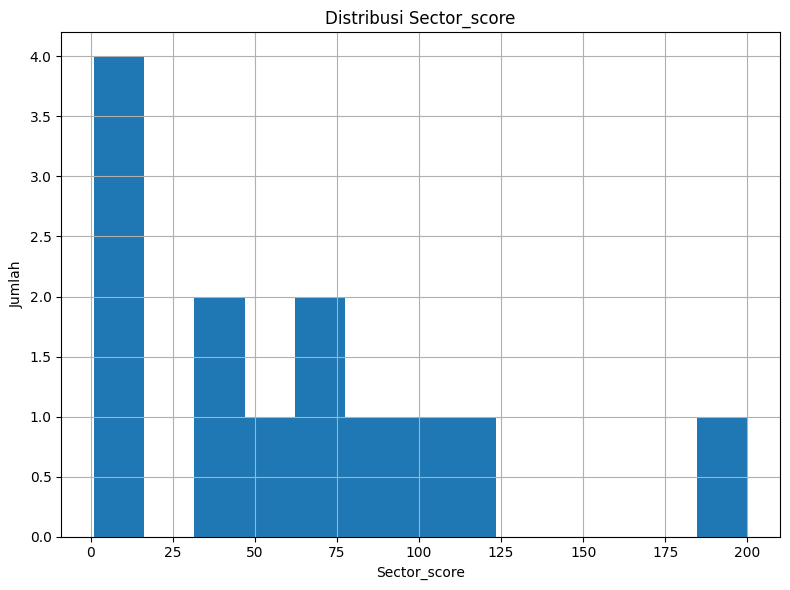

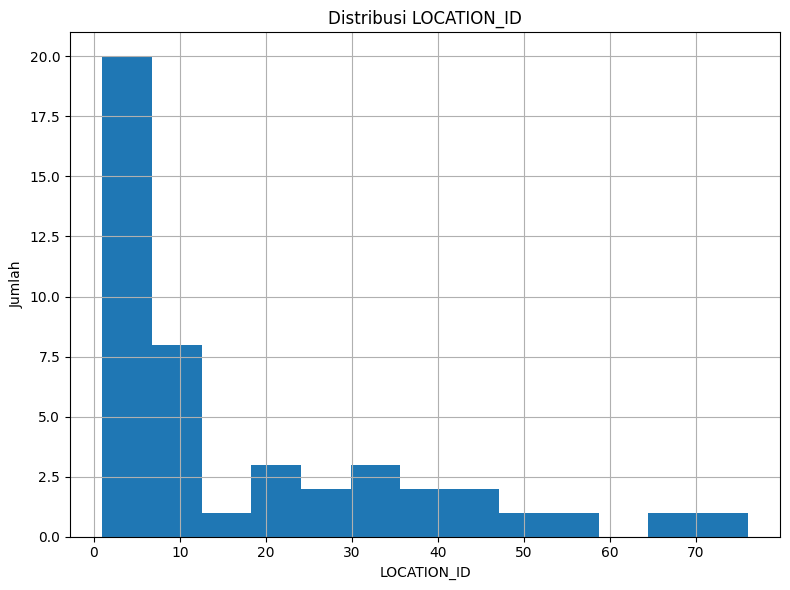

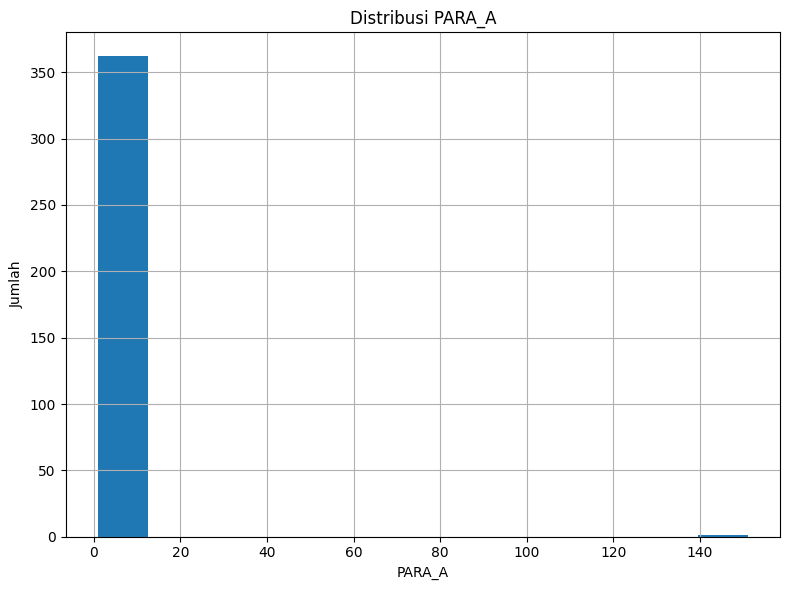

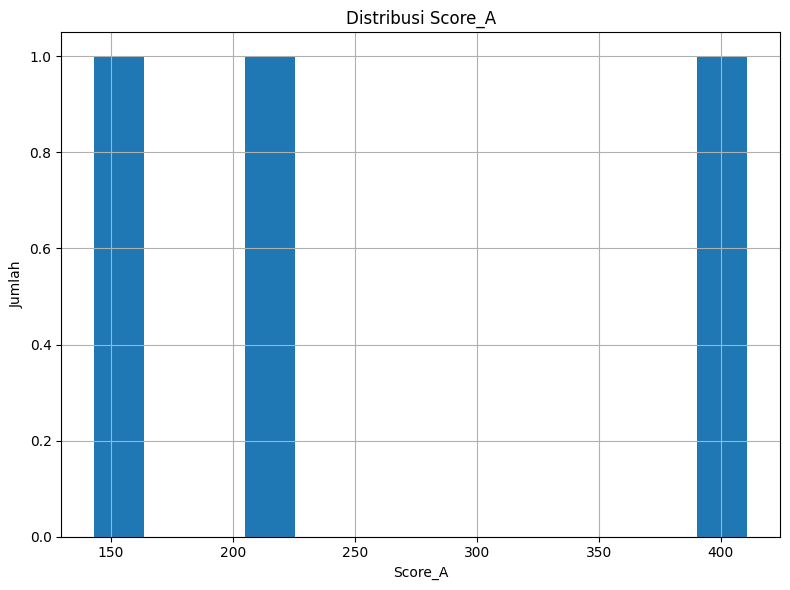

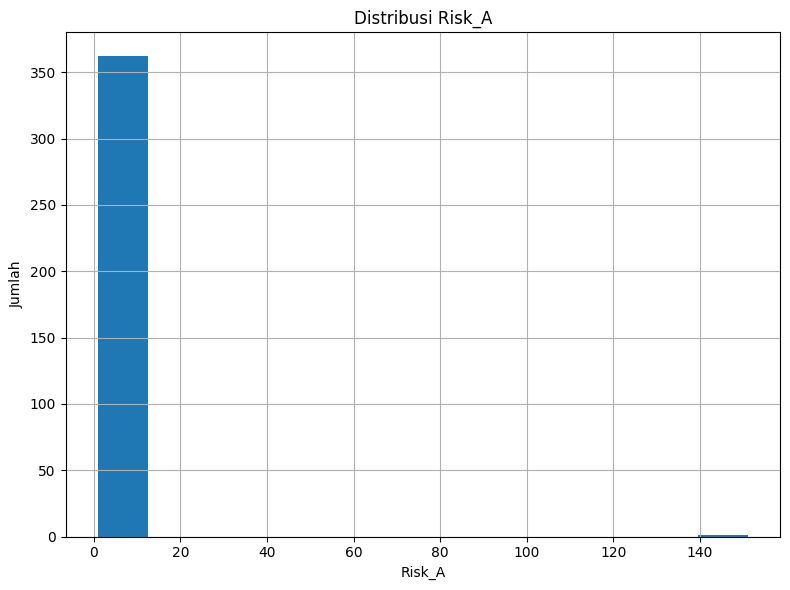

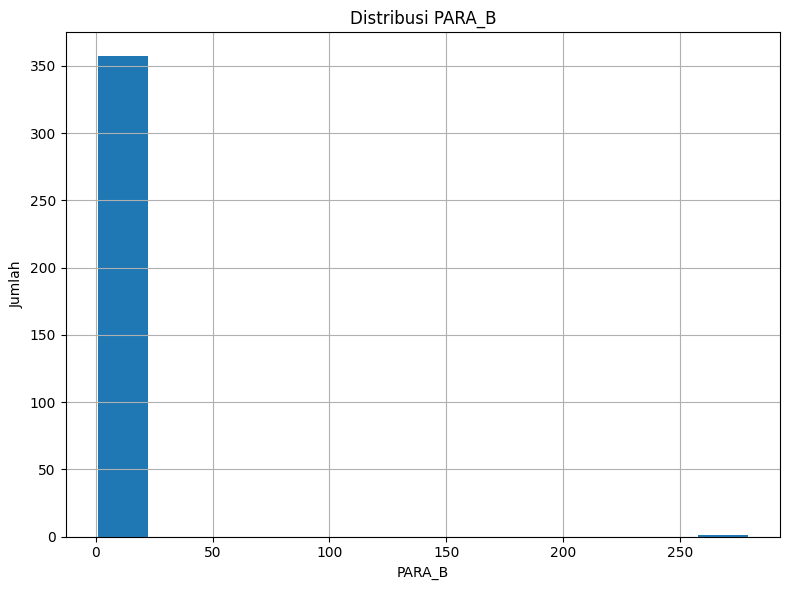

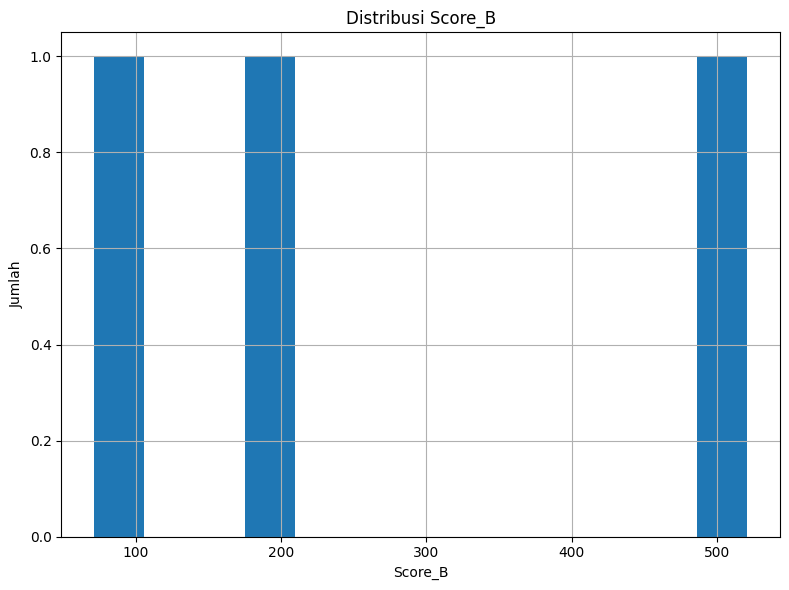

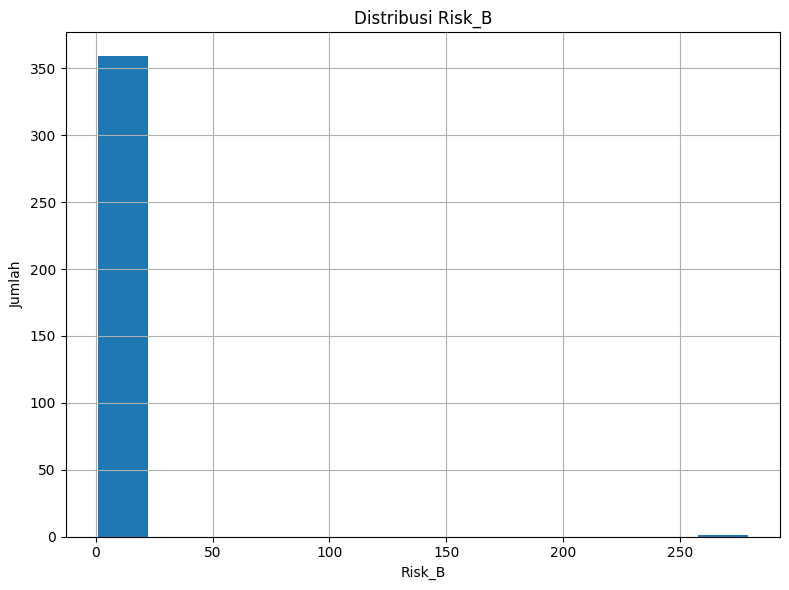

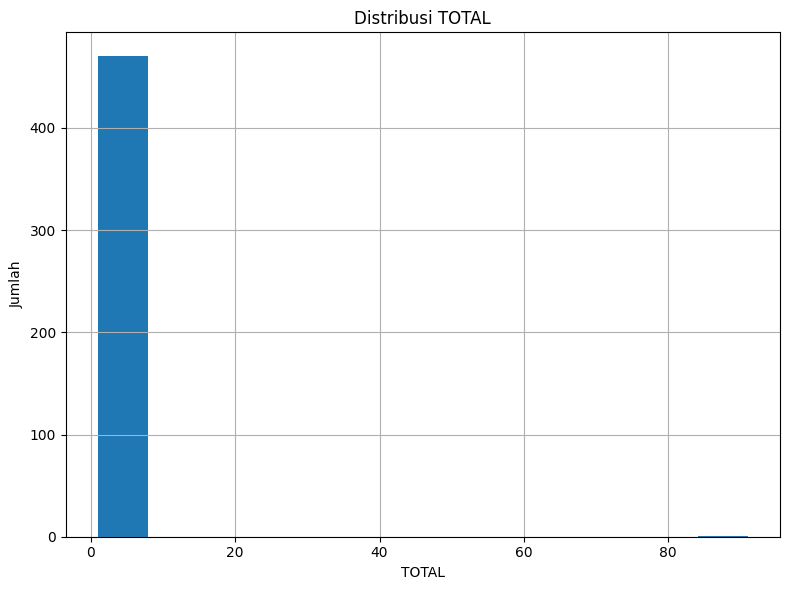

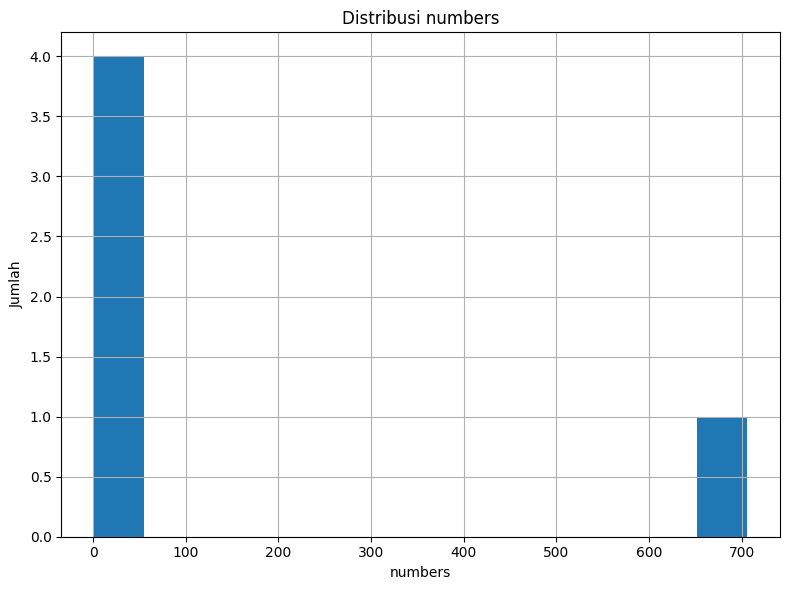

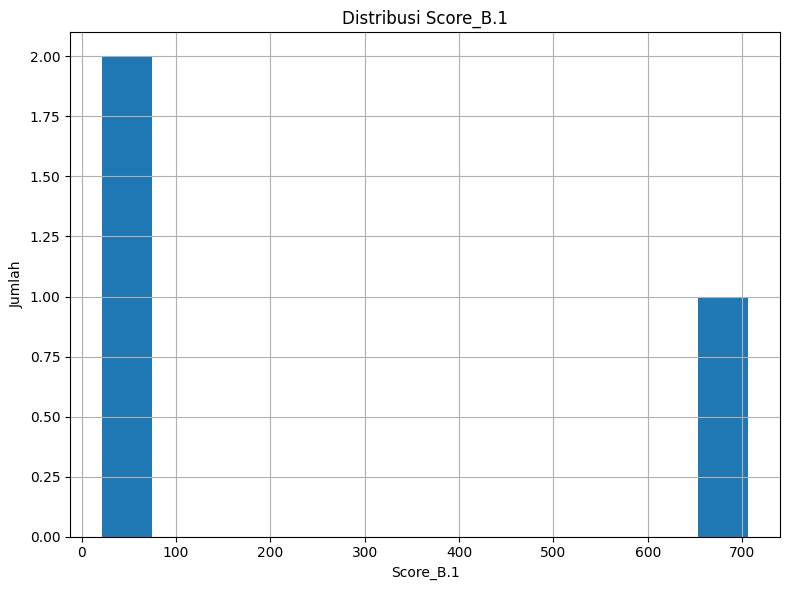

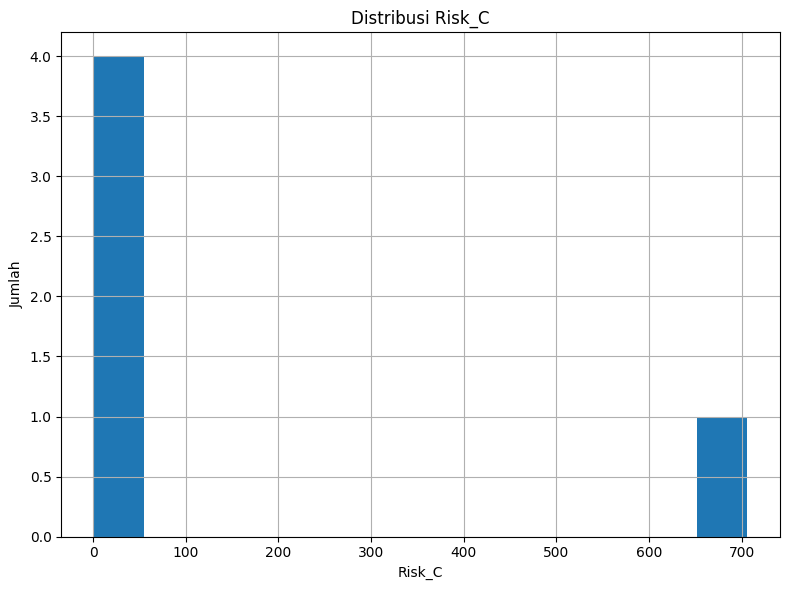

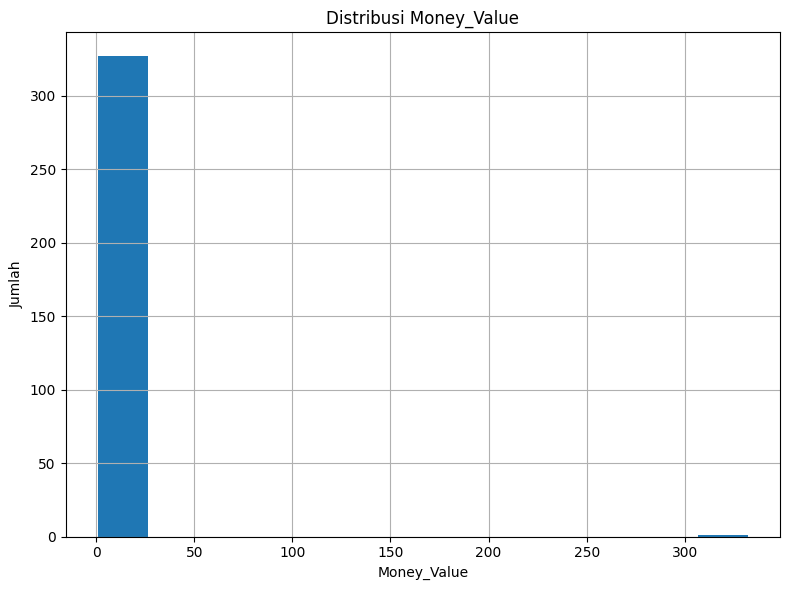

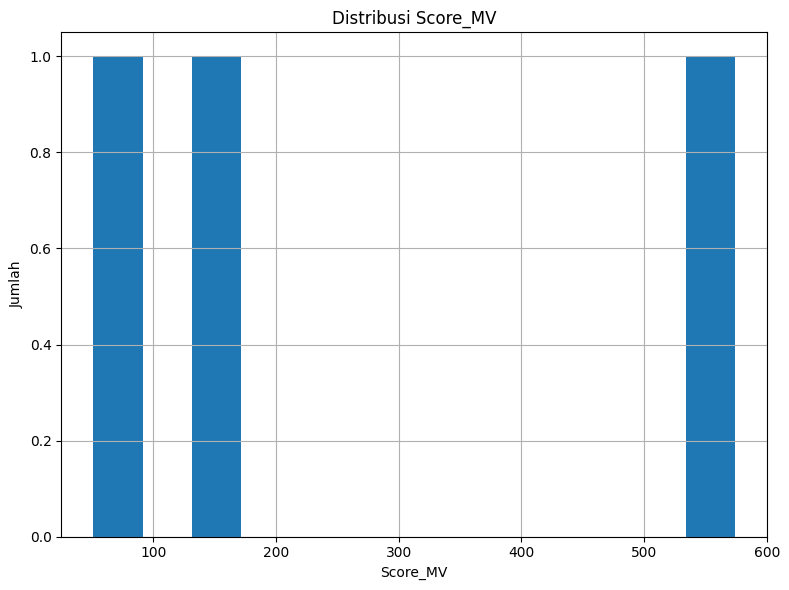

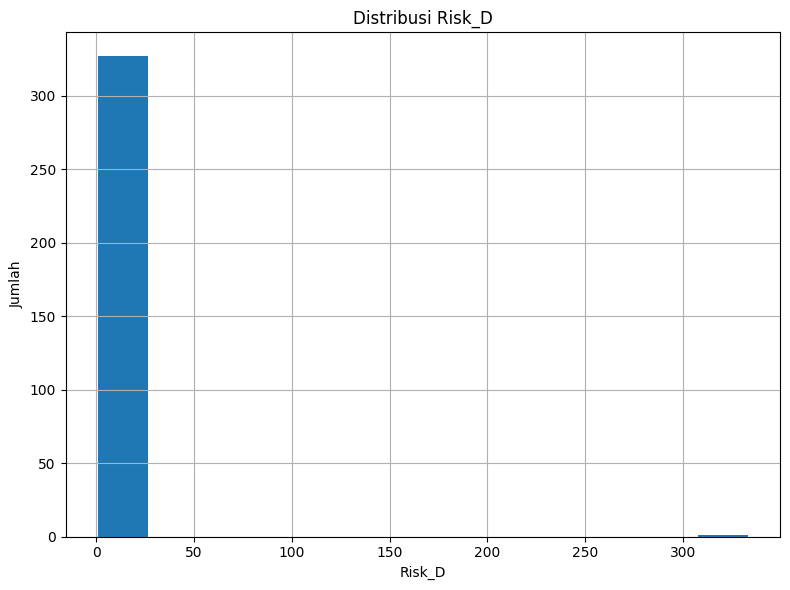

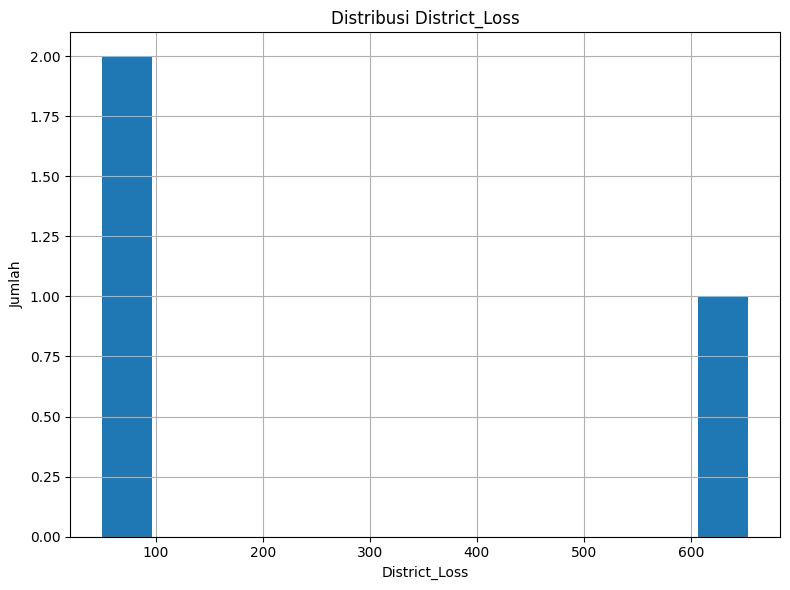

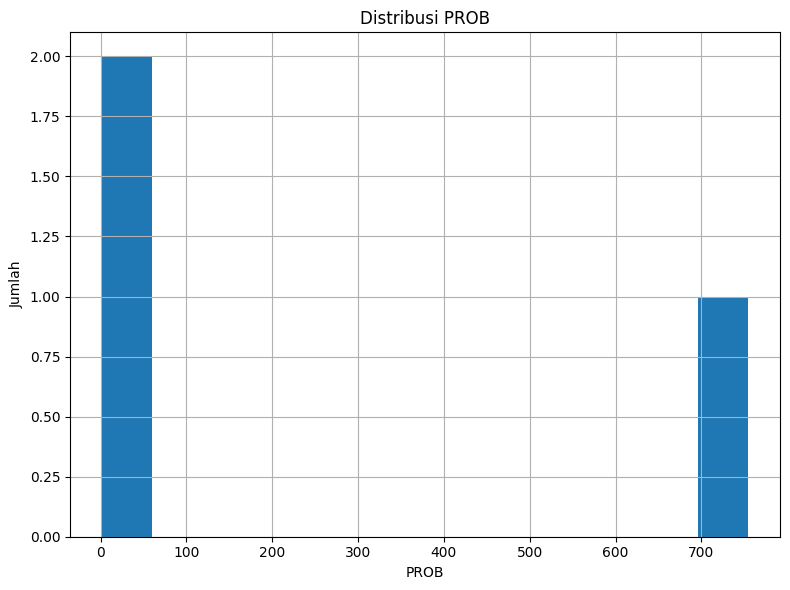

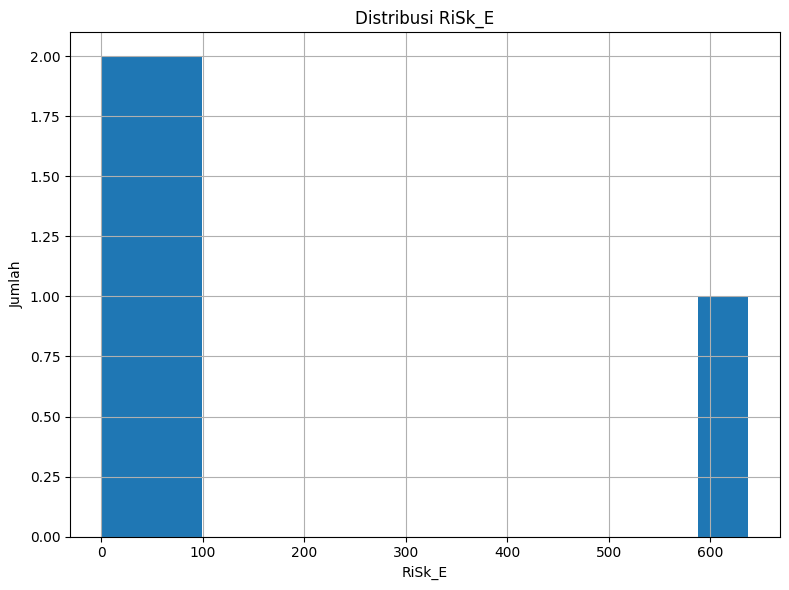

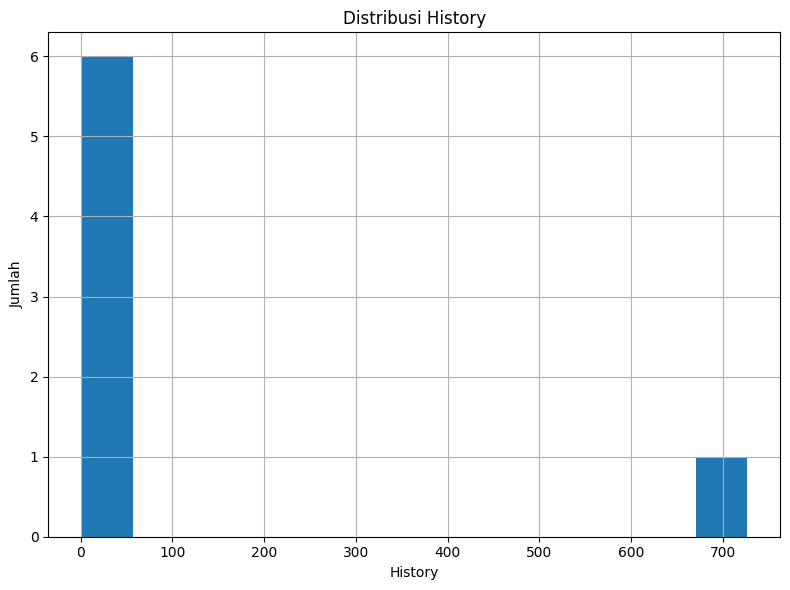

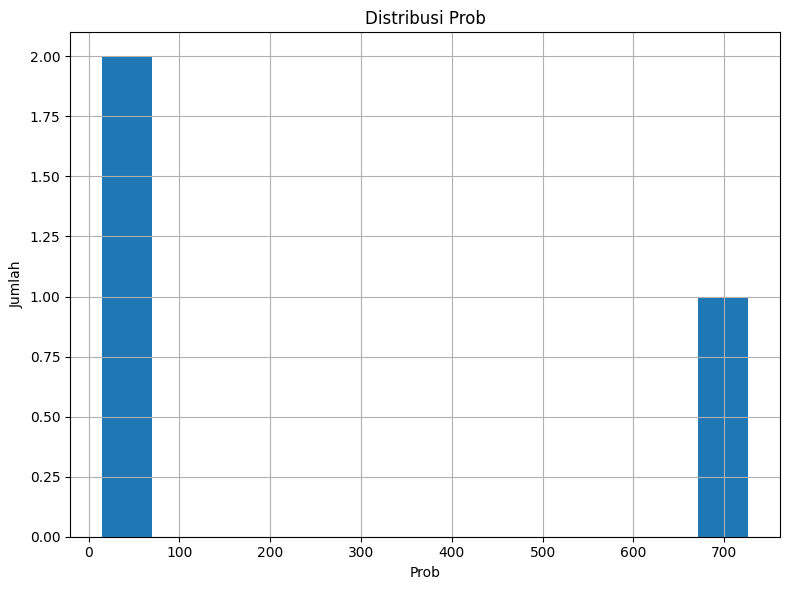

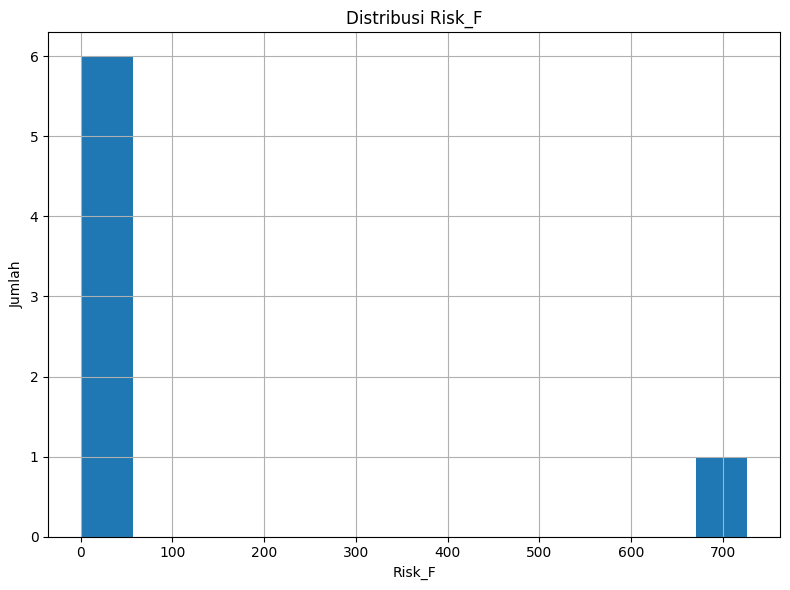

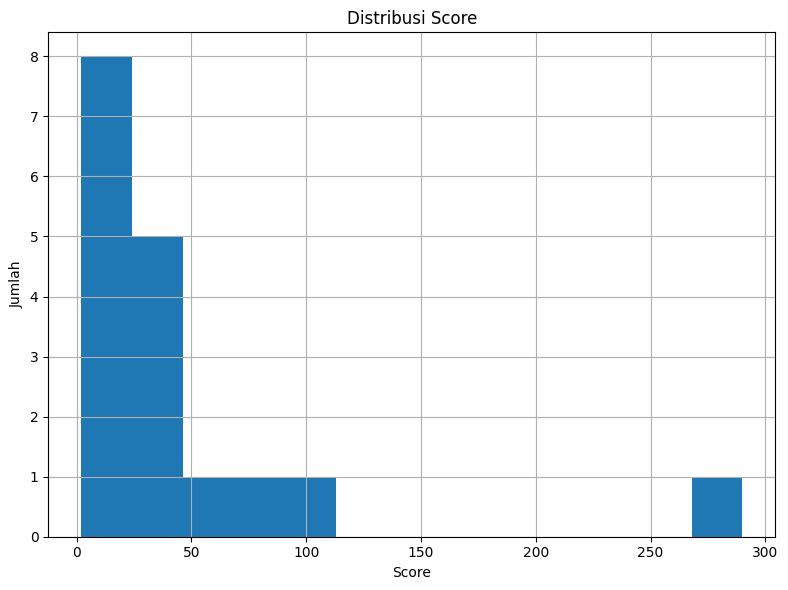

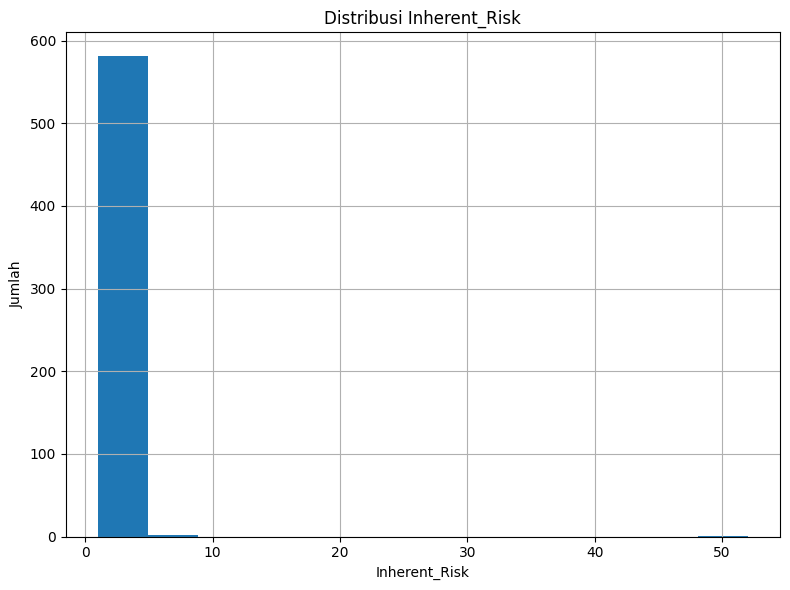

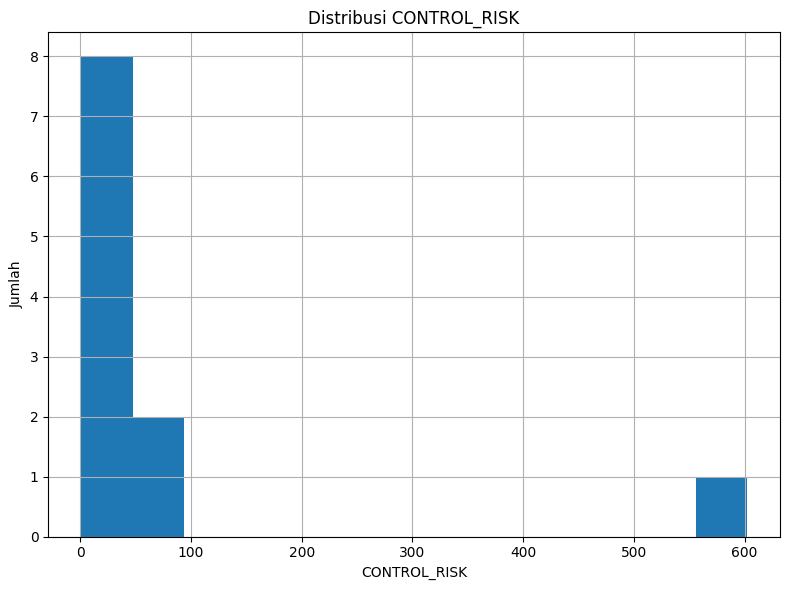

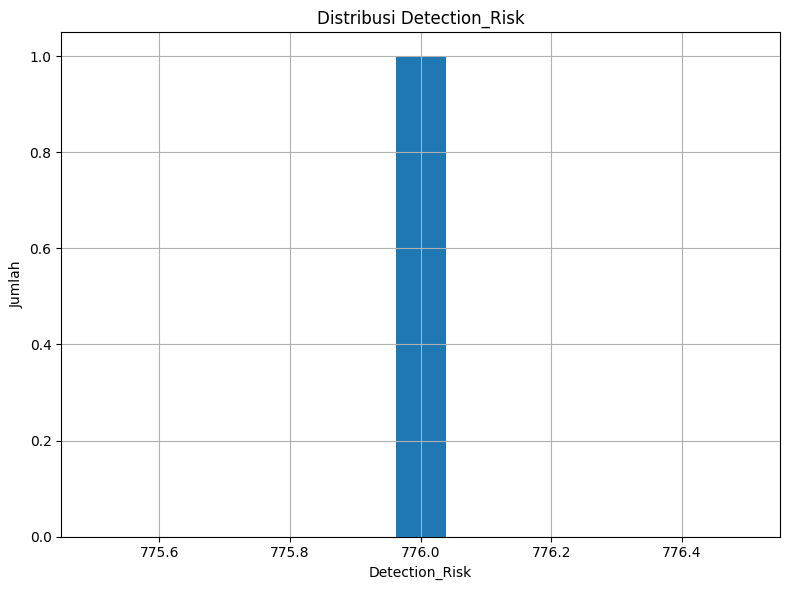

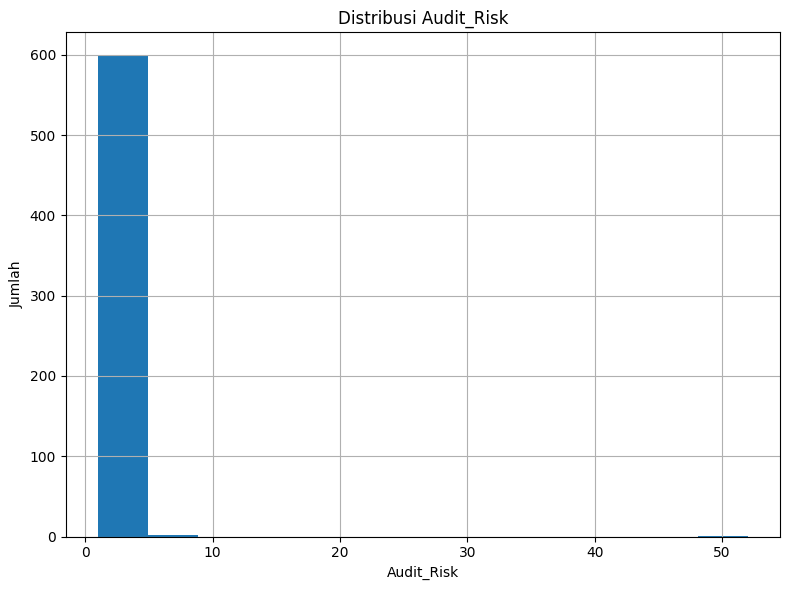

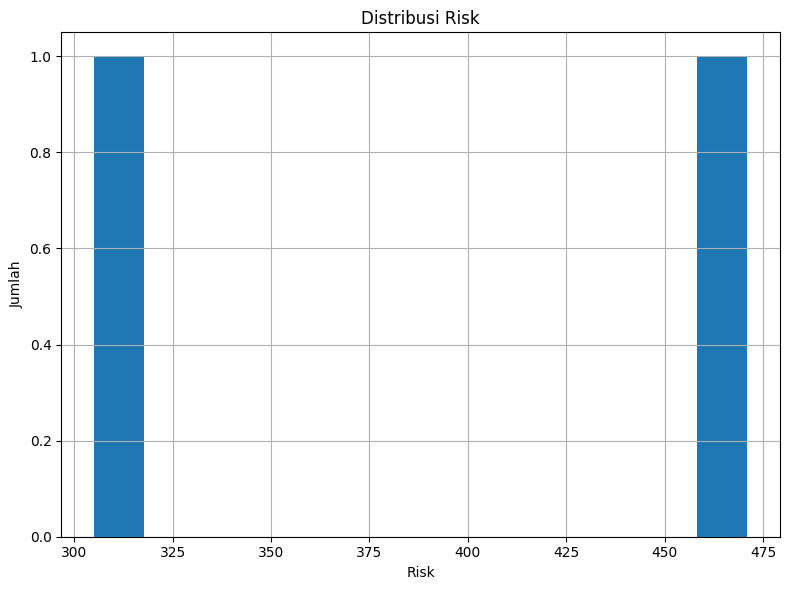

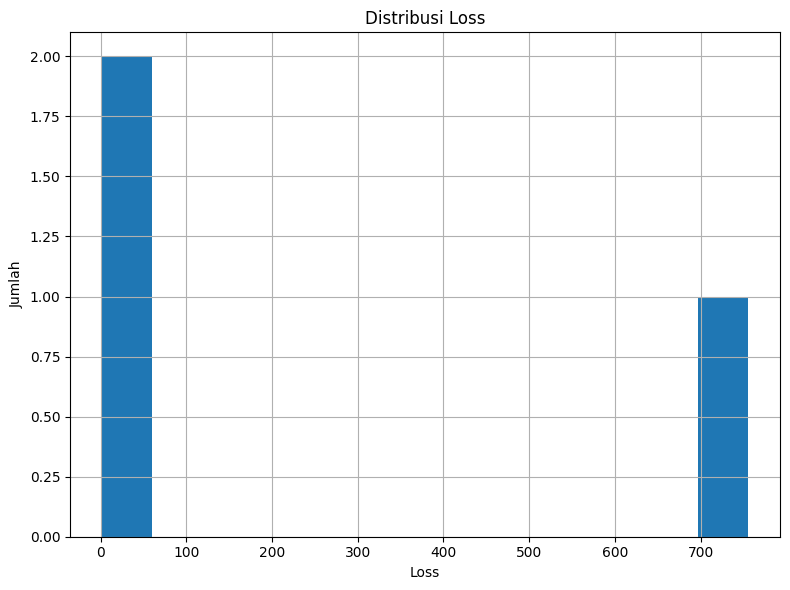

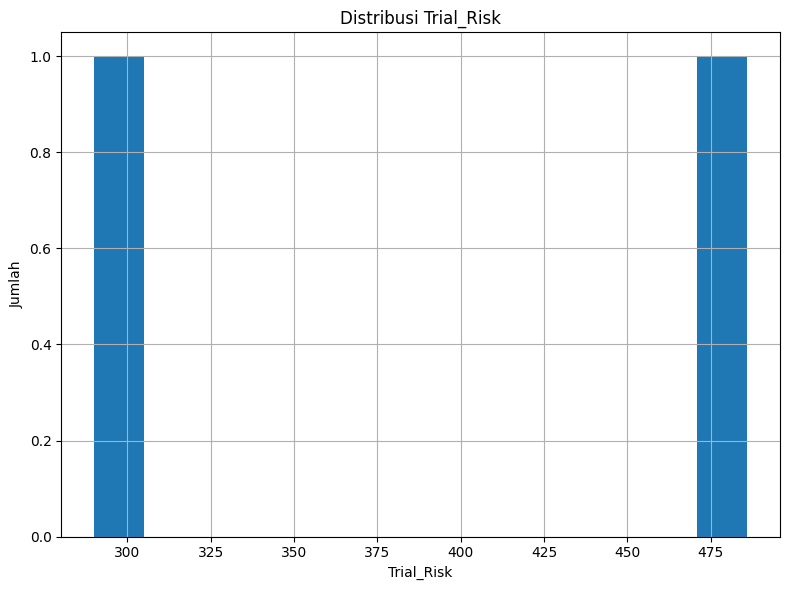

In [ ]:
# visualisasi data_numerikal (univariate)
for kolom in df:
    plt.figure(figsize=(8, 6))
    df[kolom].value_counts().hist(bins=13)
    plt.title(f'Distribusi {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Jumlah')
    plt.tight_layout()
    plt.show()

Disini kita bisa melihat, ada kolom yang memiliki nilai distribusi tunggal, seperti 'Detection_Risk'. Lalu ada beberapa kolom yang mirip atau memiliki sebaran data yang sama. Disini saya meilihat kolom 'Risk' dan
Trial_Risk' memiliki nilai yang mirip.

## Bivariate Analysis

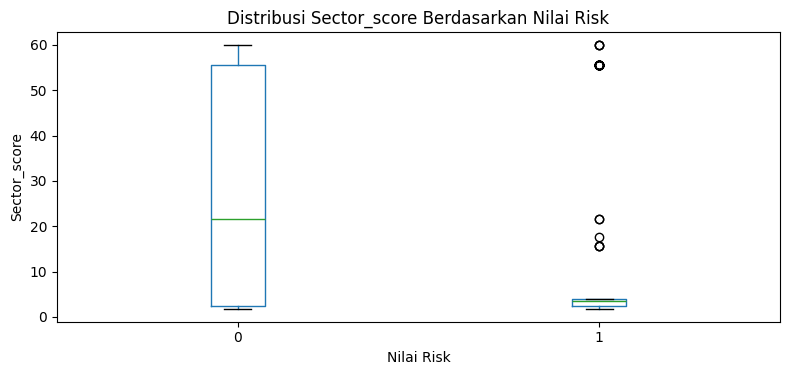

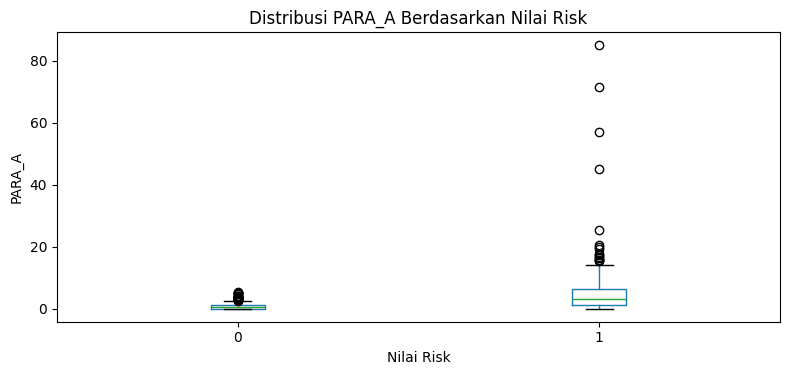

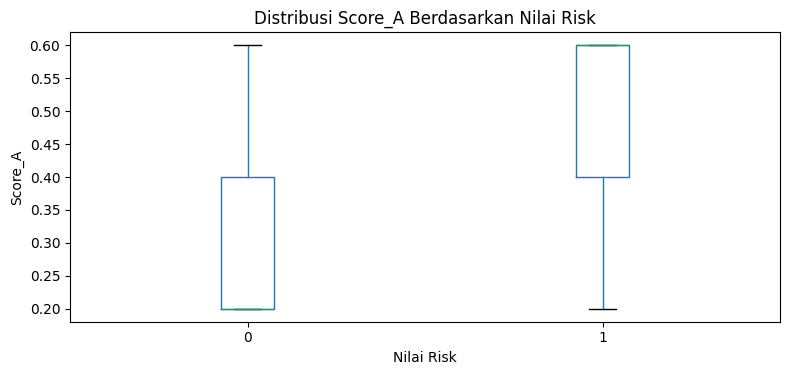

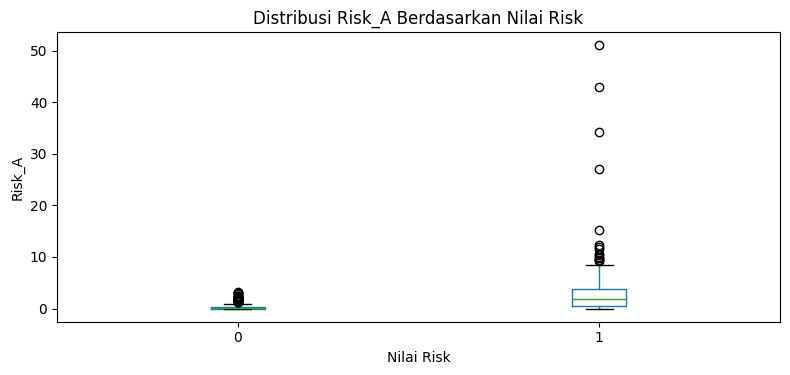

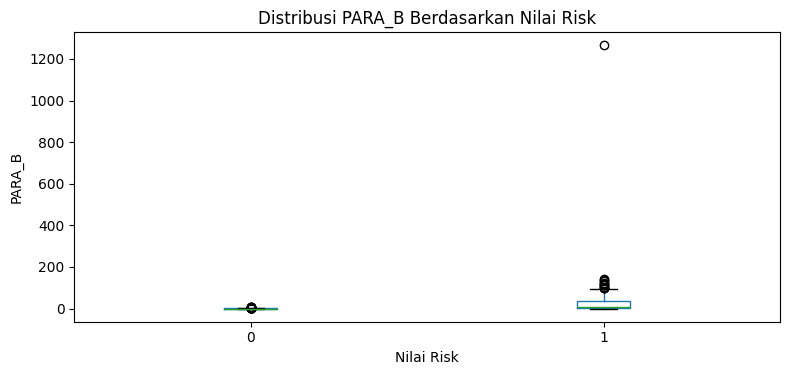

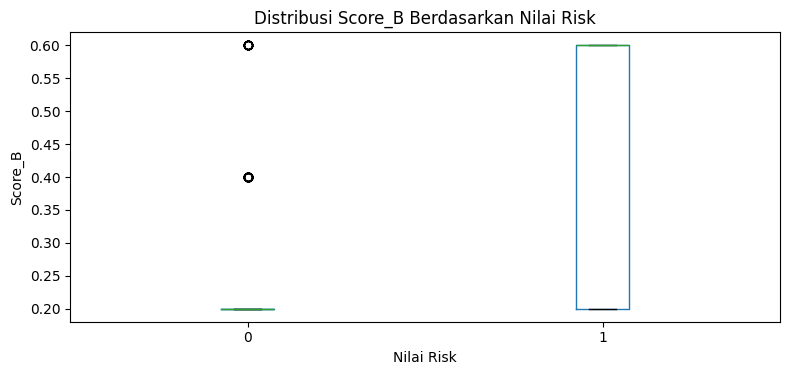

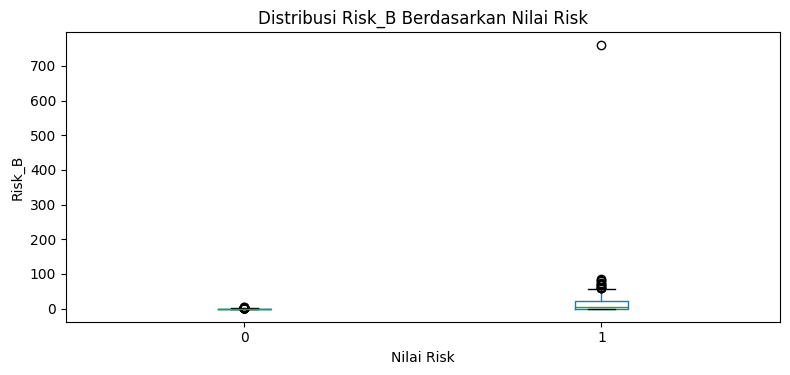

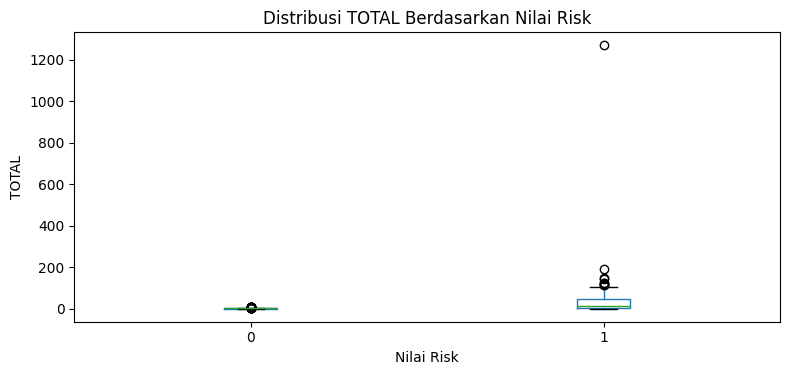

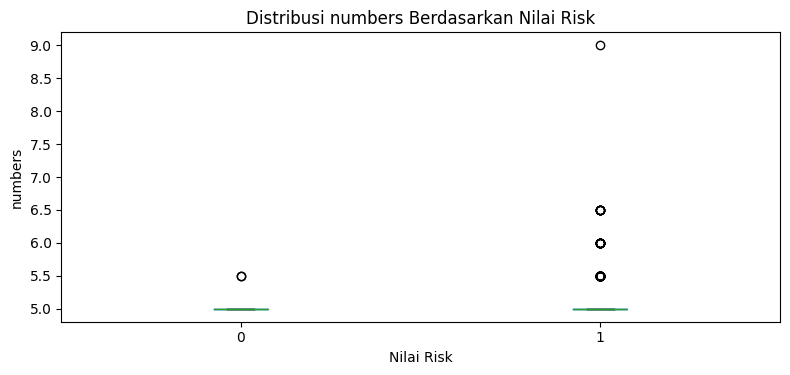

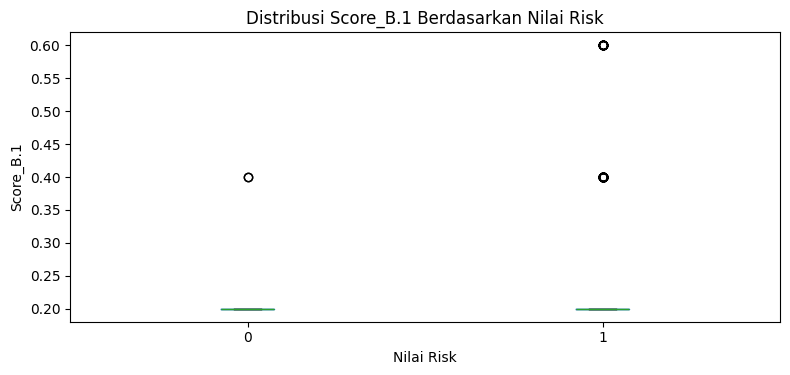

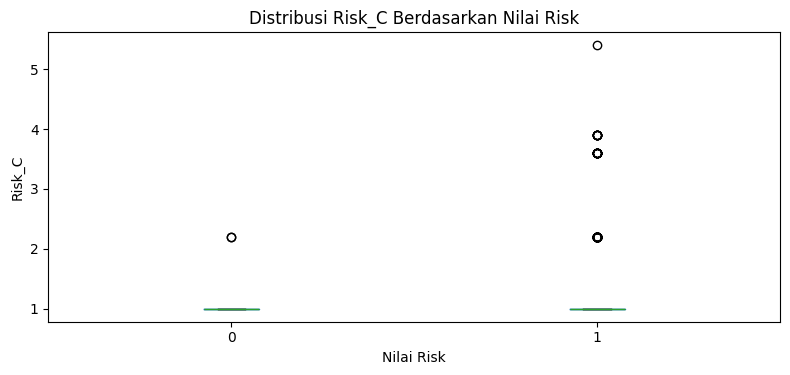

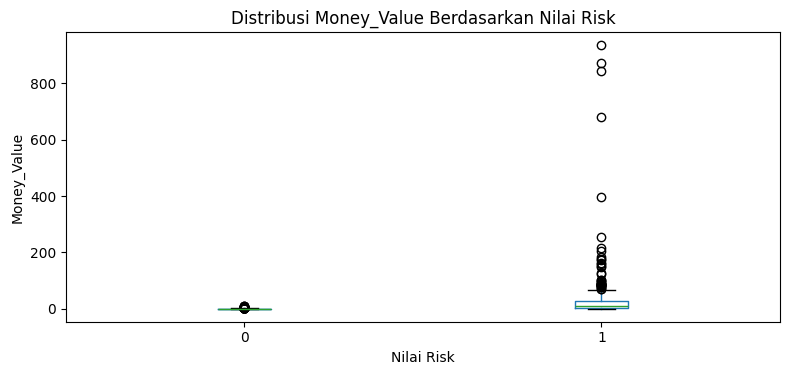

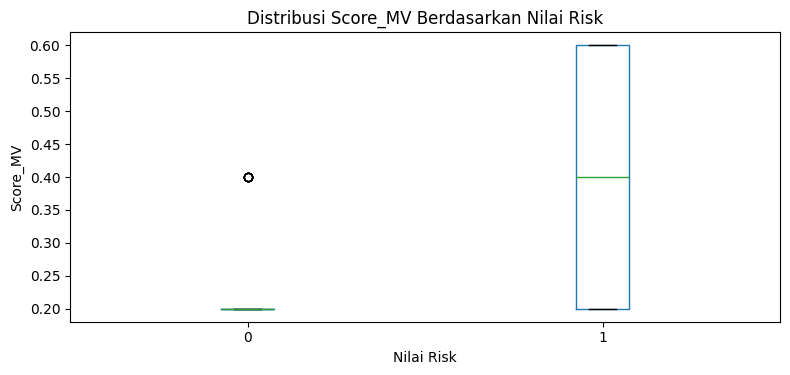

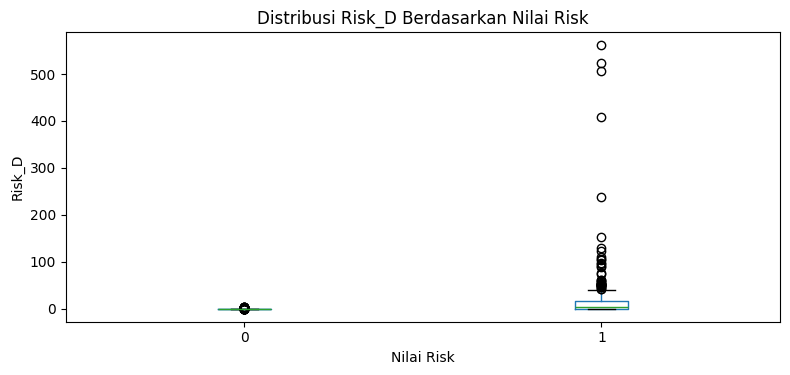

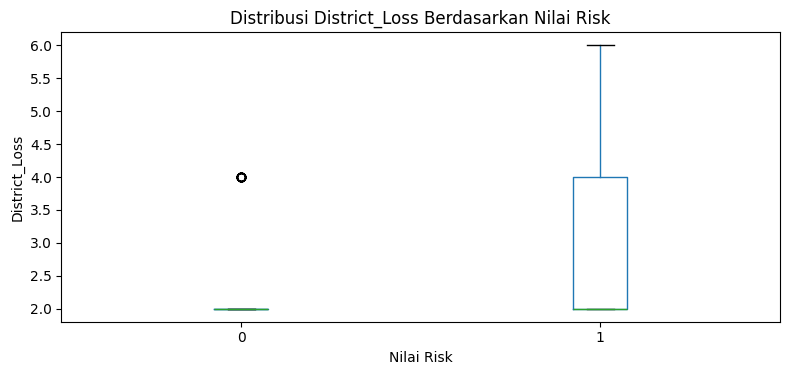

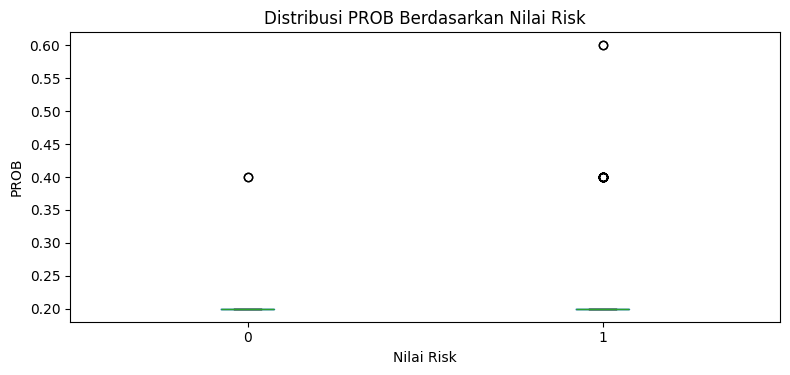

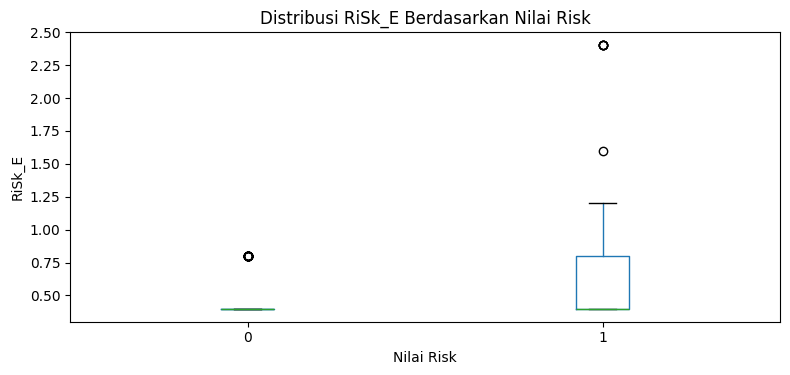

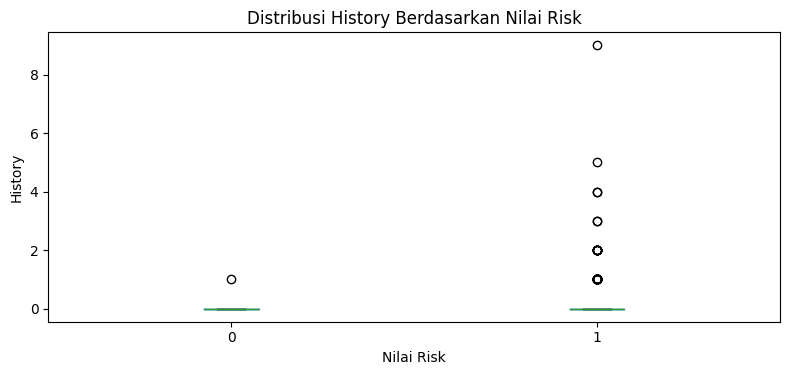

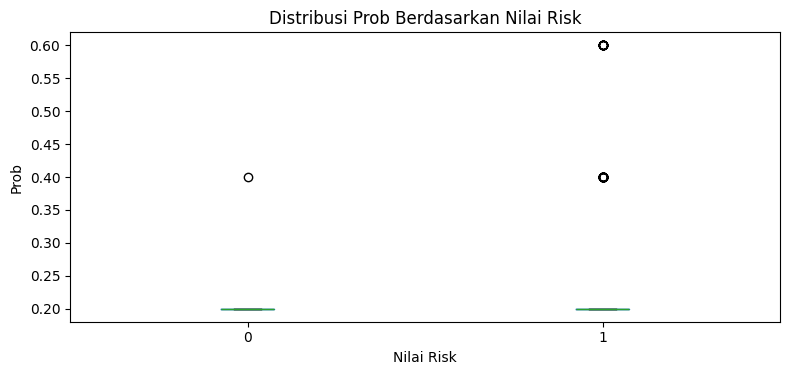

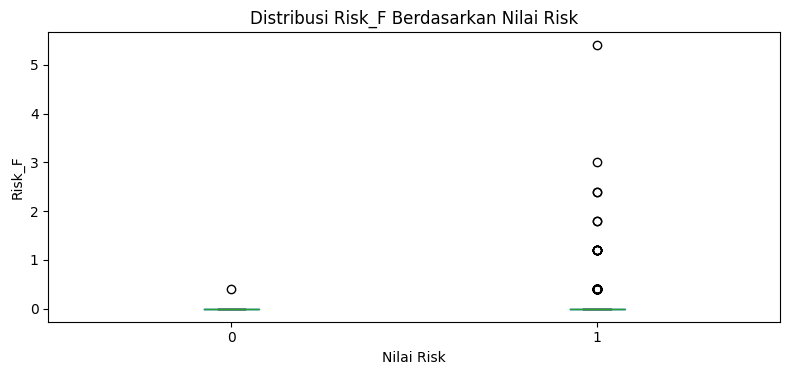

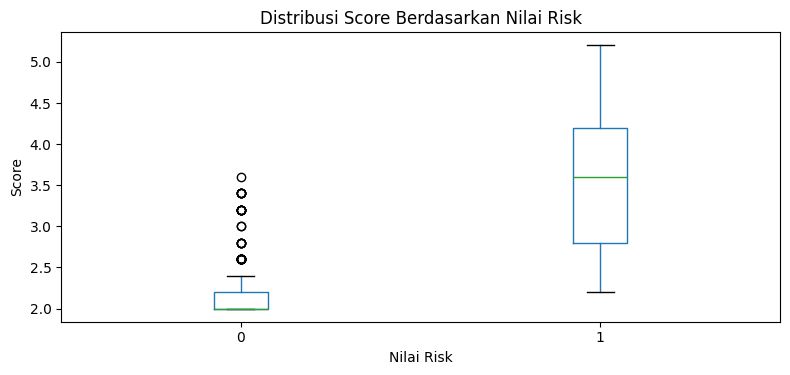

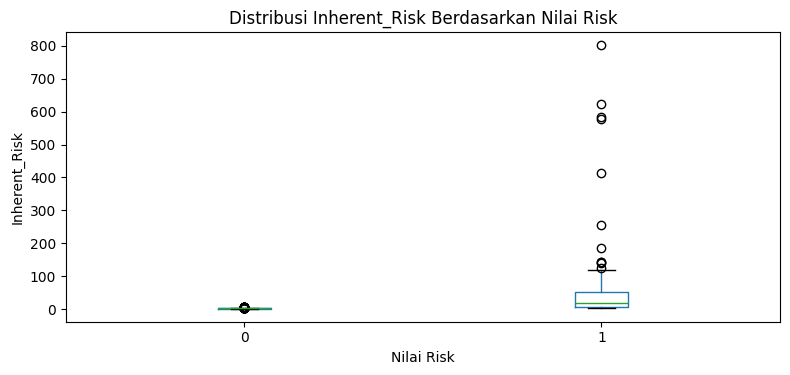

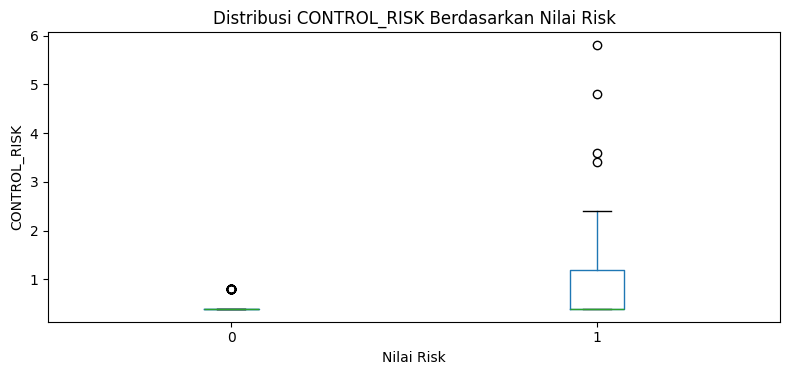

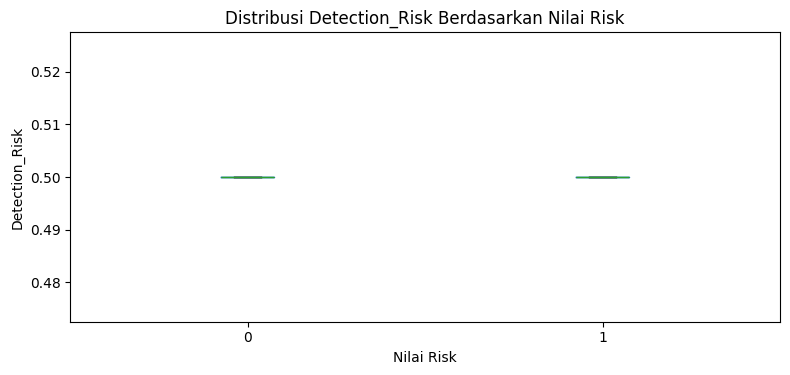

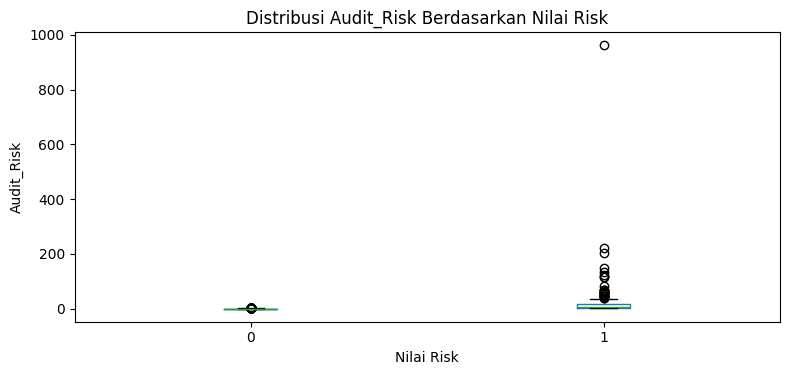

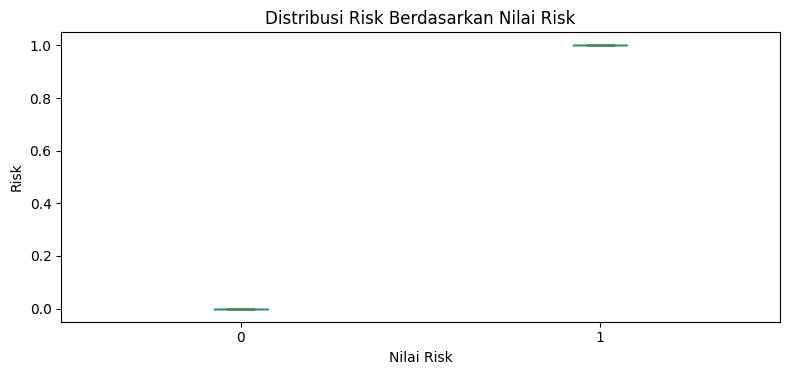

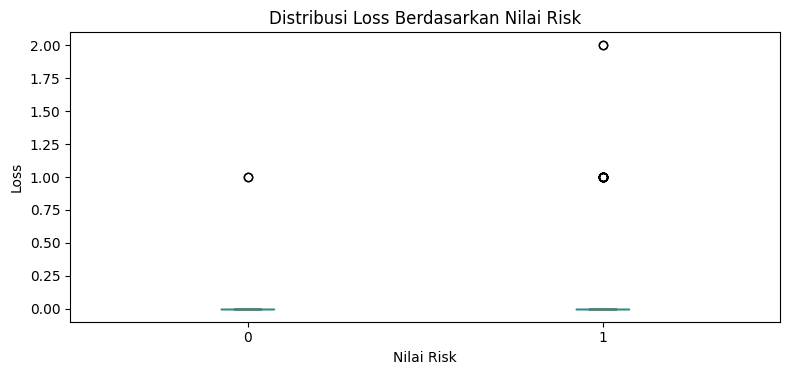

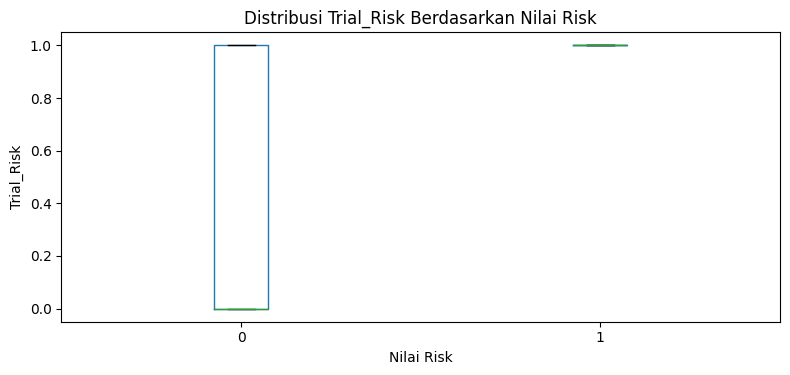

In [ ]:
# visualisasi data_numerikal (bivariate)
koloms_numerikal = df.select_dtypes(include=np.number).columns

for kolom in koloms_numerikal:
    plt.figure(figsize=(8, 4))
    df.boxplot(column=kolom, by='Risk', grid=False, ax=plt.gca())
    plt.title(f'Distribusi {kolom} Berdasarkan Nilai Risk')
    plt.suptitle('')
    plt.xlabel('Nilai Risk')
    plt.ylabel(kolom)
    plt.tight_layout()
    plt.show()

Dari hasil ini kita mendapatkan, banyak sekali kolom yang memiliki nilai outlier.

## Multivariate Analysis

In [ ]:
# visualisasi data_numerikal (multivariate)
numerik = df.select_dtypes(include=[np.number])

korelasi = numerik.corr().abs()
korelasi

,Sector_score,LOCATION_ID,PARA_A,Score_A,PARA_B,Score_B,numbers,Money_Value,Score_MV,District_Loss,PROB,History,CONTROL_RISK,Risk
Sector_score,1.000000,0.067229,0.216824,0.425198,0.132670,0.218967,0.151840,0.117589,0.318910,0.108202,0.086750,0.114798,0.154950,0.394131
LOCATION_ID,0.067229,1.000000,0.008381,0.071424,0.005048,0.117864,0.004956,0.066641,0.101038,0.110332,0.004407,0.081186,0.126853,0.052769
PARA_A,0.216824,0.008381,1.000000,0.496680,0.161940,0.358550,0.133786,0.449318,0.285991,0.127804,0.043707,0.118279,0.149198,0.378758
Score_A,0.425198,0.071424,0.496680,1.000000,0.249438,0.572655,0.242692,0.206131,0.478876,0.088662,0.093648,0.177932,0.170872,0.619726
PARA_B,0.132670,0.005048,0.161940,0.249438,1.000000,0.347568,0.209855,0.125033,0.314548,0.082944,0.042551,0.203582,0.186709,0.257029
Score_B,0.218967,0.117864,0.358550,0.572655,0.347568,1.000000,0.277576,0.205139,0.567591,0.004654,0.092567,0.200841,0.127827,0.635768
numbers,0.151840,0.004956,0.133786,0.242692,0.209855,0.277576,1.000000,0.186188,0.446666,0.125010,0.035807,0.202327,0.228657,0.308141
Money_Value,0.117589,0.066641,0.449318,0.206131,0.125033,0.205139,0.186188,1.000000,0.391373,0.028231,0.031781,0.080080,0.069524,0.256992
Score_MV,0.318910,0.101038,0.285991,0.478876,0.314548,0.567591,0.446666,0.391373,1.000000,0.081098,0.129921,0.246881,0.217455,0.688367
District_Loss,0.108202,0.110332,0.127804,0.088662,0.082944,0.004654,0.125010,0.028231,0.081098,1.000000,0.055304,0.069379,0.645127,0.403806


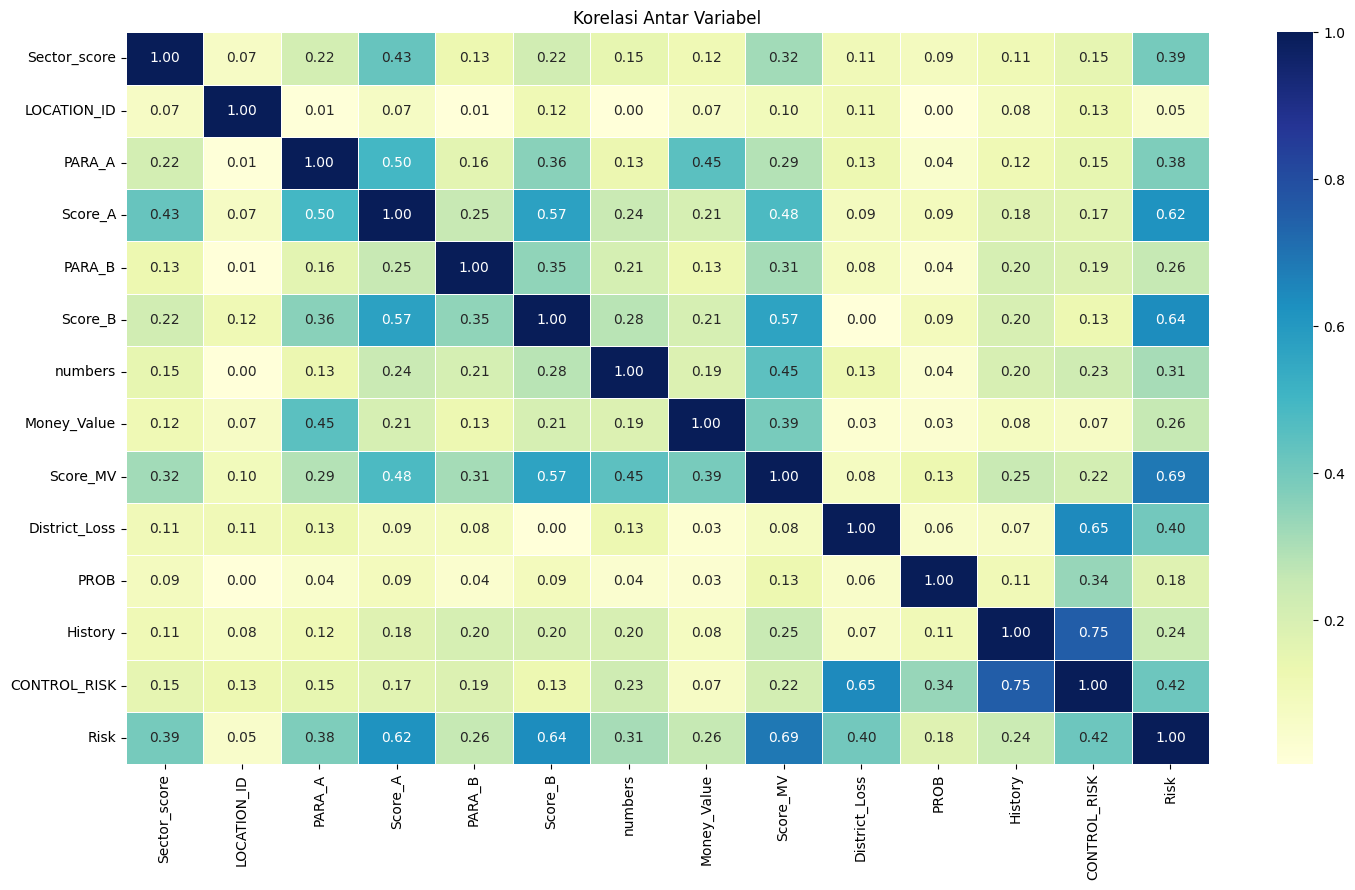

In [ ]:
# visualisasi mmultivariate dengan heatmap agar lebih mudah melihat datanya
plt.figure(figsize=(15, 9))
sns.heatmap(korelasi, fmt='.2f', annot=True, cmap='YlGnBu', linewidth=0.5)
plt.title('Korelasi Antar Variabel')
plt.tight_layout()
plt.show()

Disini banyak sekali data yang saling berkorelasi, untuk menghindari overfitting model. Disini saya memilih untuk menghapus kolom yang memiliki nilai korelasi lebih dari 0.8

# Feature Engineering Data Pre-Processing

## Handle Multikolinearitas
(korelasi yang kuat antara dua atau lebih variabel independen)

In [ ]:
# Ambil segitiga atas matriks korelasi untuk menghindari duplikasi
upper = korelasi.where(np.triu(np.ones(korelasi.shape), k=1).astype(bool))

# Temukan kolom yang memiliki korelasi lebih dari 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop kolom yang berkorelasi tinggi
df.drop(columns=to_drop, inplace=True)

# Menampilkan kolom-kolom yang dihapus (opsional)
print("Kolom yang dihapus karena korelasi tinggi:", to_drop)

Kolom yang dihapus karena korelasi tinggi: []


## Drop kolom 'Trial_Risk'

In [ ]:
# Menghapus kolom 'Trial_Risk' karena memiliki nilai yang mirip dengan 'Risk'
df.drop(columns=['Trial_Risk'], inplace=True)

## Drop kolom 'Detection_Risk'

In [ ]:
# Menghapus kolom 'Detection_Risk' karena memiliki nilai tunggal
df.drop(columns=['Detection_Risk'], inplace=True)

## Drop kolom 'Location_ID'

In [ ]:
df.drop(columns=['LOCATION_ID'], inplace=True)

## Handling Missing Value

In [ ]:
# Menangani missing value
df.isnull()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,numbers,Money_Value,Score_MV,District_Loss,PROB,History,CONTROL_RISK,Risk
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,False,False,False,False,False,False,False,False,False,False,False,False,False
772,False,False,False,False,False,False,False,False,False,False,False,False,False
773,False,False,False,False,False,False,False,False,False,False,False,False,False
774,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Memakai fungsi tambahan sum() agar lebih mudah melihatnya
df.isnull().sum()

,0
Sector_score,0
PARA_A,0
Score_A,0
PARA_B,0
Score_B,0
numbers,0
Money_Value,1
Score_MV,0
District_Loss,0
PROB,0


In [ ]:
# Mengisi nilai 'Money_Value' dengan nilai median
df['Money_Value'] = df['Money_Value'].fillna(df['Money_Value'].median())

(-0.2, 1.2)

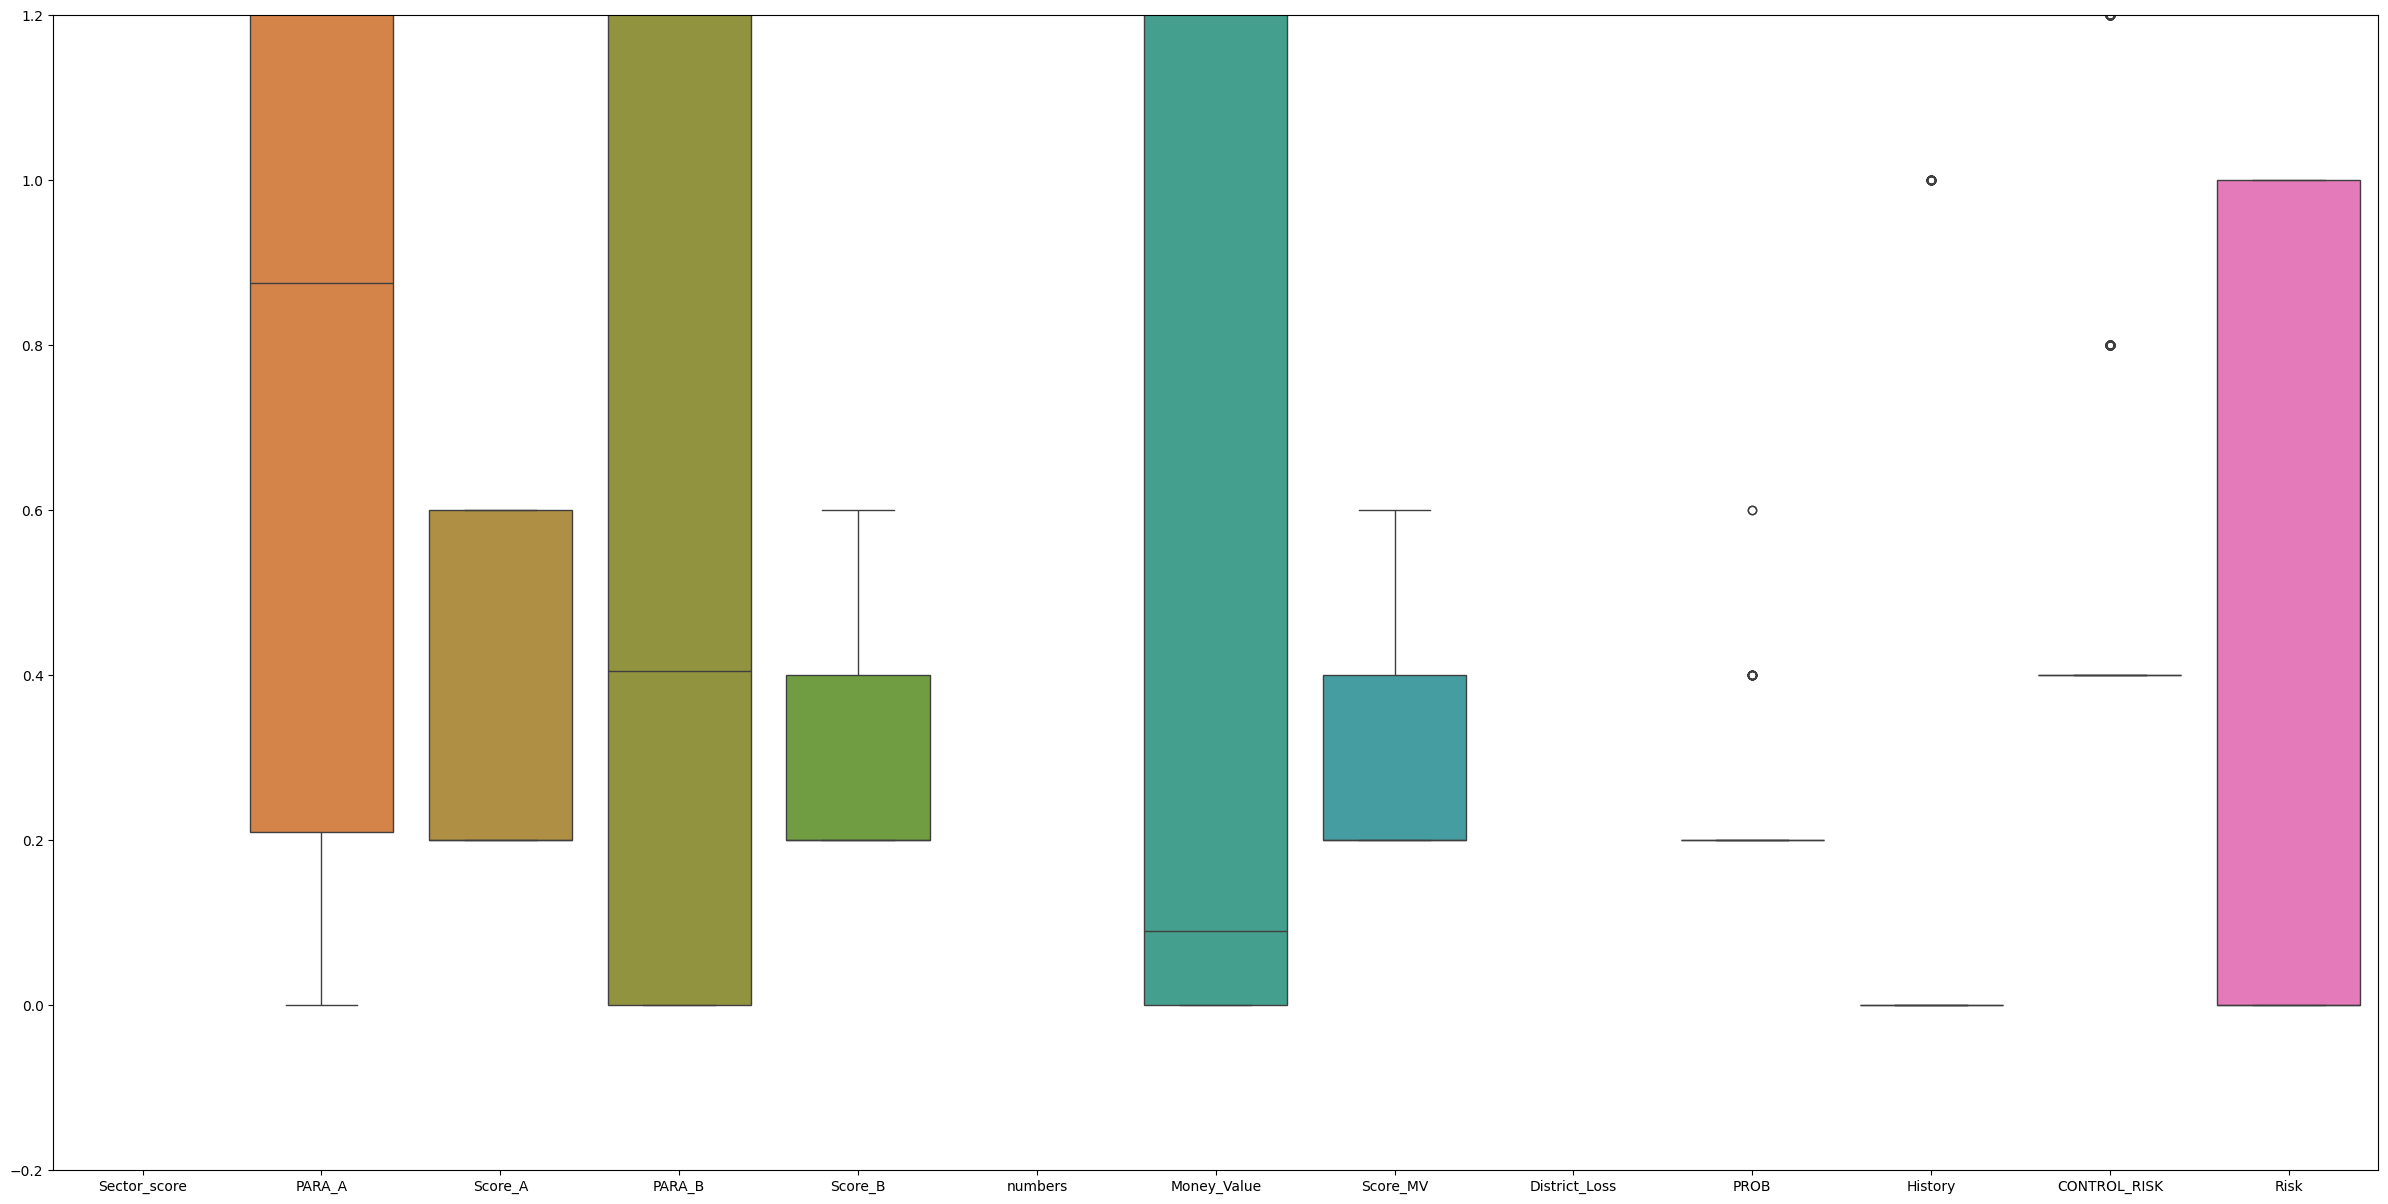

In [ ]:
# Melihat data Sebelum dilakukan handling outlier
x1=pd.DataFrame(df)
plt.figure(figsize=(30,15))
sns.boxplot(data = x1)
plt.ylim(-0.2,1.2)

## Handling Outlier

In [ ]:
# Tambahkan ini jika multikolinier tidak di handle
# 'Risk_A', 'Risk_B', 'TOTAL', 'Score_B.1', 'Risk_C', 'Risk_D', 'RiSk_E', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'Audit_Risk', 'Loss'


#loop outlier
outlier = [
    'Sector_score', 'PARA_A', 'PARA_B', 'Score_B', 'numbers', 'Money_Value',
    'Score_MV', 'District_Loss', 'PROB', 'History', 'CONTROL_RISK'
]

for kolom in outlier:
  # hitung median
  median = df[kolom].median()
  # menghitung Q1, Q2, dan Q3
  Q1 = df[kolom].quantile(0.25)
  Q3 = df[kolom].quantile(0.75)
  IQR = Q3 - Q1

  # menentukan batas atas dan batas bawah
  lower_bound = Q3 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  #ganti outlier dengan nilai median
  df.loc[(df[kolom] < lower_bound) | (df[kolom] > upper_bound), kolom] = median
  print (f'\n Penanganan outlier pada {kolom}')
  print (f'batas bawah outlier: {lower_bound: .2f}')
  print (f'batas atas outlier: {upper_bound: .2f}')
  print (f'median: {median: .2f}')


 Penanganan outlier pada Sector_score
batas bawah outlier: -24.23
batas atas outlier:  135.37
median:  3.89

 Penanganan outlier pada PARA_A
batas bawah outlier: -0.93
batas atas outlier:  5.88
median:  0.88

 Penanganan outlier pada PARA_B
batas bawah outlier: -2.08
batas atas outlier:  10.40
median:  0.41

 Penanganan outlier pada Score_B
batas bawah outlier:  0.10
batas atas outlier:  0.70
median:  0.20

 Penanganan outlier pada numbers
batas bawah outlier:  5.00
batas atas outlier:  5.00
median:  5.00

 Penanganan outlier pada Money_Value
batas bawah outlier: -2.79
batas atas outlier:  13.97
median:  0.09

 Penanganan outlier pada Score_MV
batas bawah outlier:  0.10
batas atas outlier:  0.70
median:  0.20

 Penanganan outlier pada District_Loss
batas bawah outlier:  2.00
batas atas outlier:  2.00
median:  2.00

 Penanganan outlier pada PROB
batas bawah outlier:  0.20
batas atas outlier:  0.20
median:  0.20

 Penanganan outlier pada History
batas bawah outlier:  0.00
batas atas out

(-0.2, 1.2)

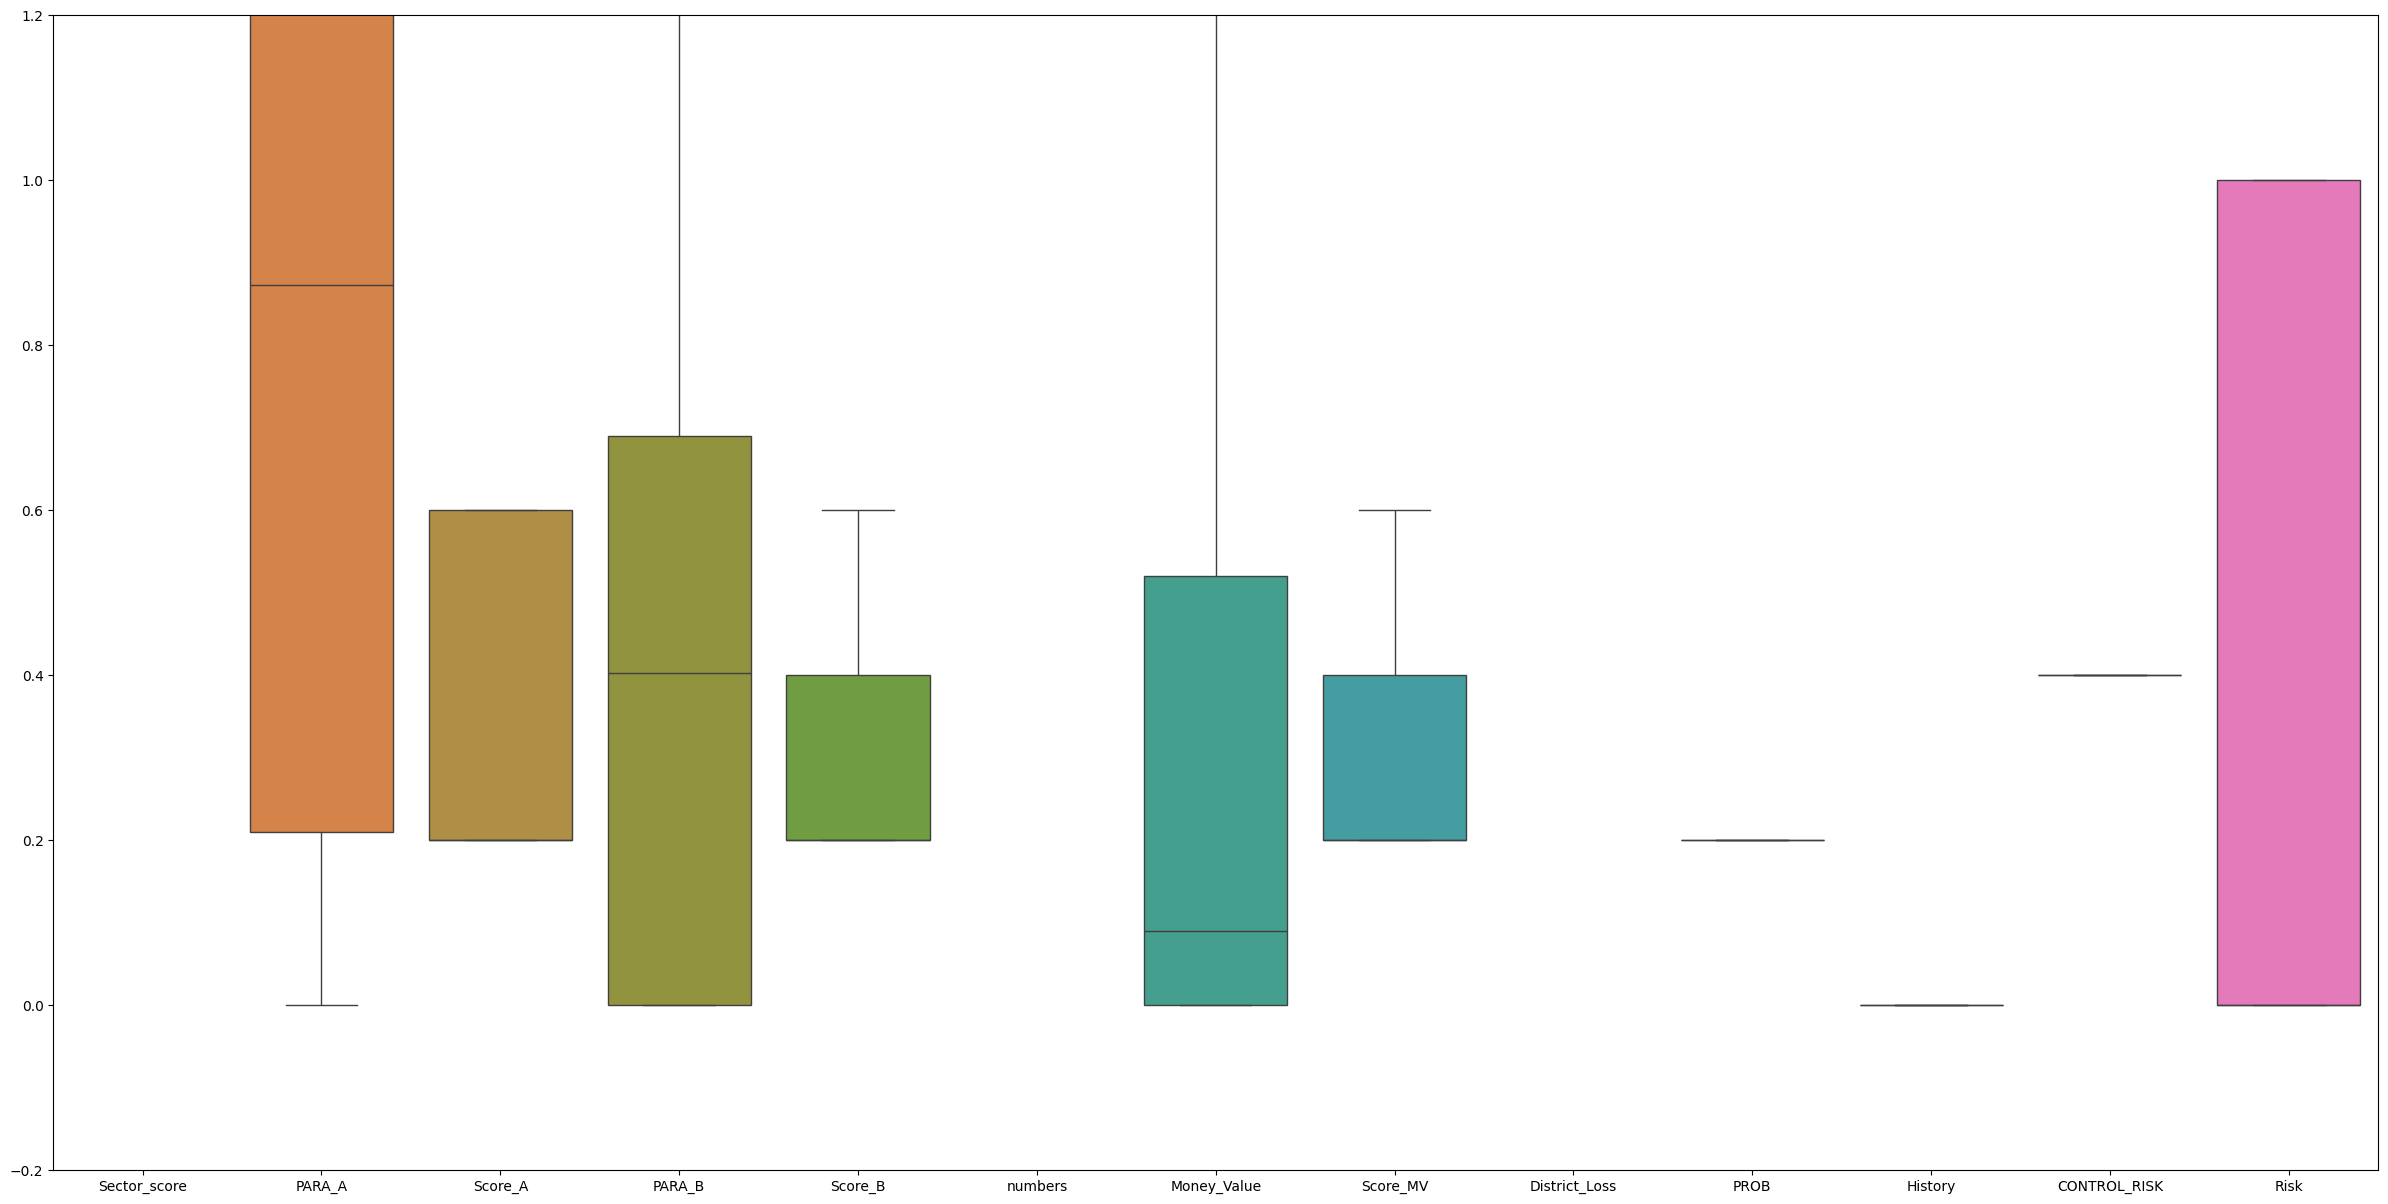

In [ ]:
# Melihat data setelah dilakukan handling outlier
x1=pd.DataFrame(df)
plt.figure(figsize=(30,15))
sns.boxplot(data = x1)
plt.ylim(-0.2,1.2)

## Drop kolom yang memiliki nilai konstan

In [ ]:
# Menghapus kolom yang hanya memiliki nilai unik 1 (konstan)
df = df.loc[:, df.nunique() > 1]

(-0.2, 1.2)

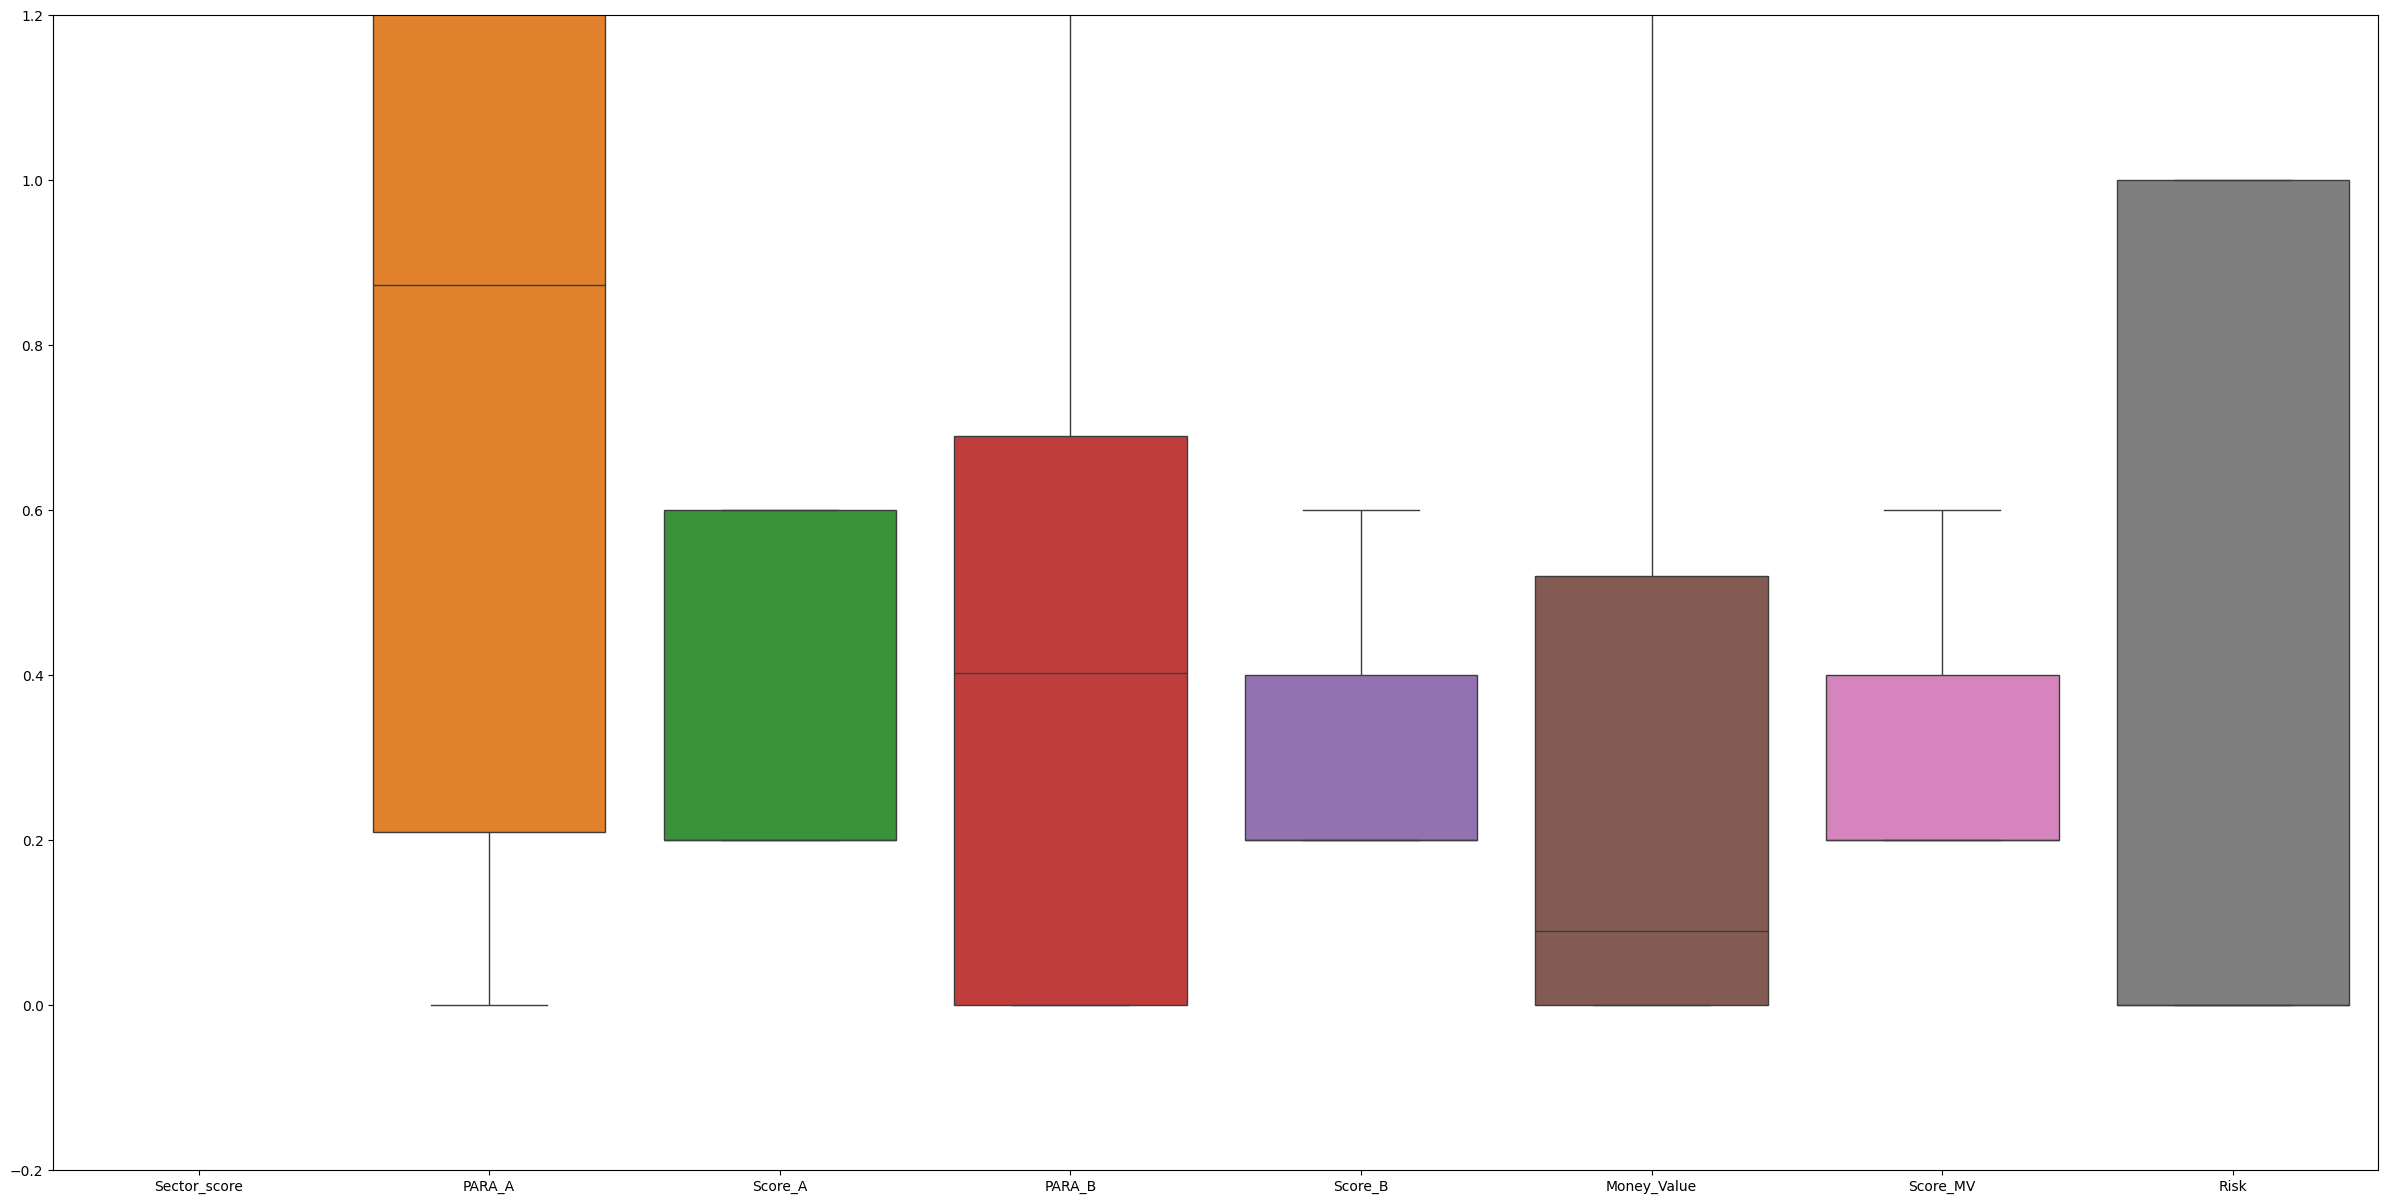

In [ ]:
# Melihat data setelah dilakukan handling nilai konstan
x1=pd.DataFrame(df)
plt.figure(figsize=(30,15))
sns.boxplot(data = x1)
plt.ylim(-0.2,1.2)

In [ ]:
print(df['Sector_score'].nunique())
print(df['Sector_score'].unique())

13
[ 3.89  3.41  2.72  2.37  1.99  1.85  2.36  2.34 15.56 17.68 21.61 59.85
 55.57]


In [ ]:
df.describe()

,Sector_score,PARA_A,Score_A,PARA_B,Score_B,Money_Value,Score_MV,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,1.160916,0.351289,0.861535,0.313144,1.264838,0.290979,0.393041
std,24.319017,1.306973,0.174055,1.715605,0.169804,2.917934,0.159745,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.200000,0.000000,0.200000,0.000000
25%,2.370000,0.210000,0.200000,0.000000,0.200000,0.000000,0.200000,0.000000
50%,3.890000,0.872500,0.200000,0.402500,0.200000,0.090000,0.200000,0.000000
75%,55.570000,1.460000,0.600000,0.690000,0.400000,0.520000,0.400000,1.000000
max,59.850000,5.870000,0.600000,10.240000,0.600000,13.880000,0.600000,1.000000


## Data Spliting

In [ ]:
# Mendefinisikan var dependen
var_dependen = np.array(df['Risk'])

In [ ]:
# Drop var dependen
df.drop(columns=['Risk'], inplace=True)

In [ ]:
# Membagi data menjadi training set dan test set
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(
    df, var_dependen, test_size=0.2, random_state=42
    )

# #Split data menjadi data latih dan data validasi
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train_org, y_train, test_size=0.2, random_state=42
# )

## Normalisasi Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Scalling data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train_org)
# X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test_org)

(-0.2, 1.2)

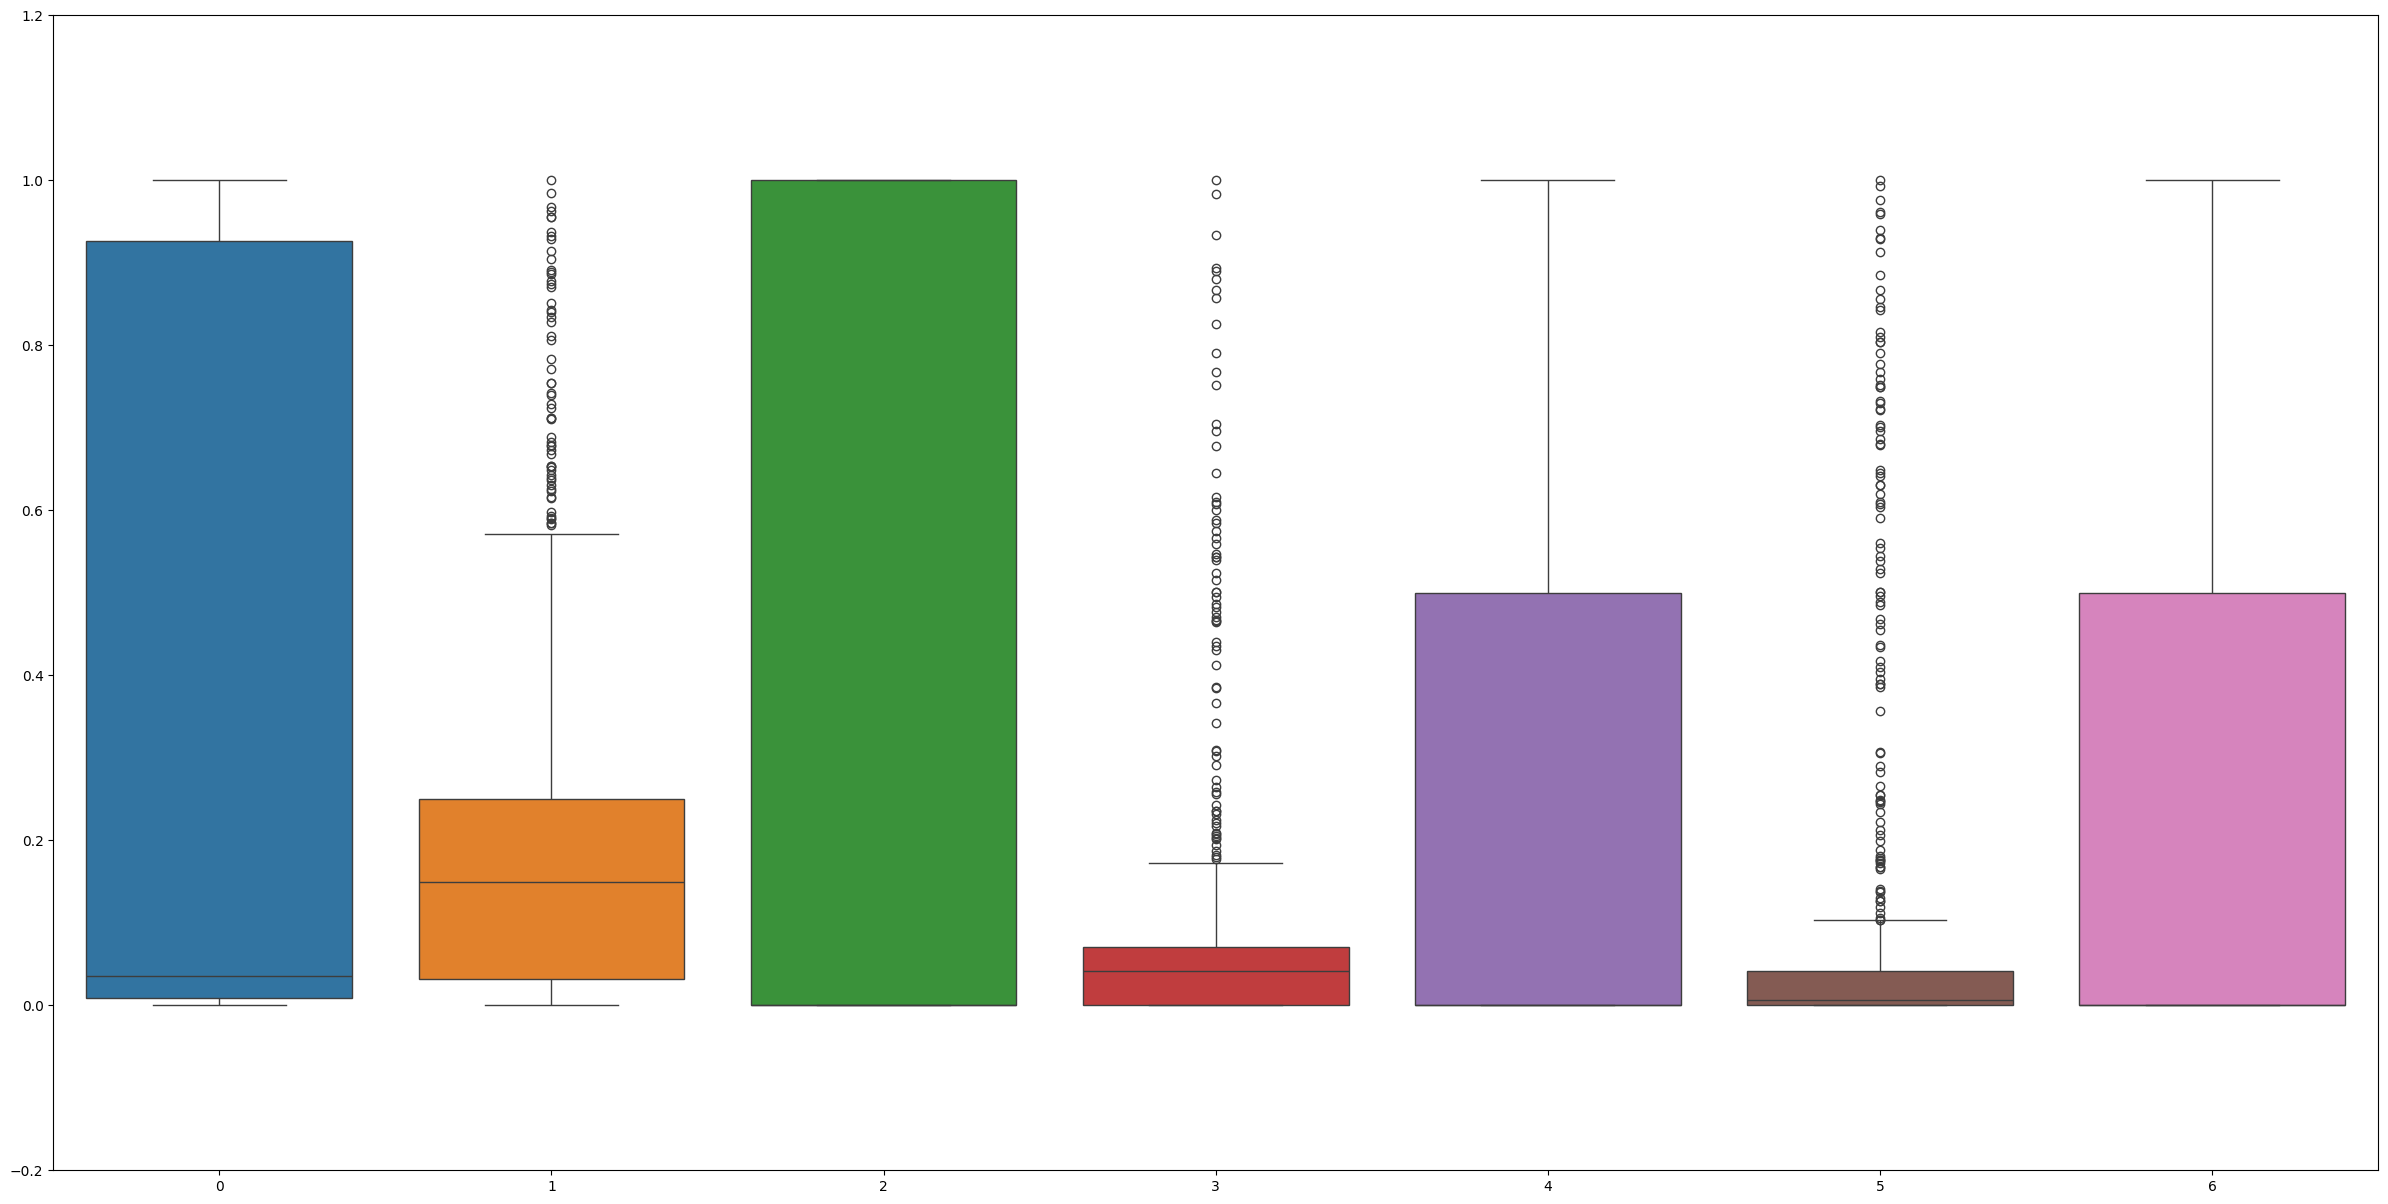

In [ ]:
# Setelah dilakukan normalisasi data dengan mixmaxscaller
x1=pd.DataFrame(X_train)
plt.figure(figsize=(30,15))
sns.boxplot(data = x1)
plt.ylim(-0.2,1.2)

# Model Classifier

## Voting

### Hard Voting

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr_hard = LogisticRegression()
lr_hard.fit(X_train, y_train)
knn_hard = KNeighborsClassifier()
knn_hard.fit(X_train, y_train)
dt_hard = DecisionTreeClassifier()
dt_hard.fit(X_train, y_train)

voting_clf_hard = VotingClassifier(estimators=[('lr', lr_hard), ('knn', knn_hard), ('dt', dt_hard)], voting='hard')
voting_clf_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (lr_hard, knn_hard, dt_hard, voting_clf_hard):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    print(clf.__class__.__name__, accuracy_score(y_test, y_test_pred))

LogisticRegression 0.8782051282051282
KNeighborsClassifier 0.8782051282051282
DecisionTreeClassifier 0.8782051282051282
VotingClassifier 0.8846153846153846


In [ ]:
report_table_1 = ['Hard Voting Classifier 1', '',accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)]

### Soft Voting

In [ ]:
lr_soft = LogisticRegression()
lr_soft.fit(X_train, y_train)
knn_soft = KNeighborsClassifier()
knn_soft.fit(X_train, y_train)
dt_soft = DecisionTreeClassifier()
dt_soft.fit(X_train, y_train)

voting_clf_soft = VotingClassifier(estimators=[('lr', lr_soft), ('knn', knn_soft), ('dt', dt_soft)], voting='soft')
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [ ]:
for clf in (knn_soft, dt_soft, lr_soft, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    print(clf.__class__.__name__, accuracy_score(y_test, y_test_pred))

KNeighborsClassifier 0.8782051282051282
DecisionTreeClassifier 0.8717948717948718
LogisticRegression 0.8782051282051282
VotingClassifier 0.8846153846153846


In [ ]:
report_table_2 = ['Soft Voting Classifier 1', '',accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)]

## Bagging

### KNN With Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

knn_param ={'n_neighbors': [3,5,7,11,15]}
knn_grid = GridSearchCV(knn, knn_param,cv = 5, n_jobs= -1)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 11, 15]})

In [ ]:
print("Best Parameters for KNN Classifier: ", knn_grid.best_params_)

Best Parameters for KNN Classifier:  {'n_neighbors': 7}


In [ ]:
knn_best = KNeighborsClassifier(**knn_grid.best_params_)
knn_bag = BaggingClassifier(knn_best, bootstrap=True, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500, 1000],
              'max_samples': [0.1, 0.5, 1.0]}

#grid model
bag_knn_grid = GridSearchCV(knn_bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=7),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'max_samples': [0.1, 0.5, 1.0],
                         'n_estimators': [100, 500, 1000]},
             return_train_score=True)

In [ ]:
print("Best Parameters for Bagging Classifier: ", bag_knn_grid.best_params_)

Best Parameters for Bagging Classifier:  {'max_samples': 1.0, 'n_estimators': 100}


In [ ]:
knn_bag = BaggingClassifier(
    knn_best,
    n_estimators=bag_knn_grid.best_params_['n_estimators'],
    max_samples=bag_knn_grid.best_params_['max_samples'],
    n_jobs = -1,
    bootstrap=True,
    random_state=0
)
knn_bag.fit(X_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=7),
                  n_estimators=100, n_jobs=-1, random_state=0)

In [ ]:
print("KNN with Bagging Training Score: ", knn_bag.score(X_train, y_train))
print("KNN with Bagging Testing Score: ", knn_bag.score(X_test, y_test))

KNN with Bagging Training Score:  0.9290322580645162
KNN with Bagging Testing Score:  0.8910256410256411


In [ ]:
report_table_3 = ['KNN with Bagging', 'n_neighbors: 3, max_samples: 1.0, n_estimators: 100',knn_bag.score(X_train, y_train), knn_bag.score(X_test, y_test)]

### Logistic wih Bagging

In [ ]:
# Base model
logreg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=0)

# Hyperparameter grid untuk Logistic Regression
logreg_param = {
    'C': [0.01, 0.1, 1.0, 10, 100],
    'penalty': ['l1', 'l2']
}
logreg_grid = GridSearchCV(logreg, logreg_param, cv=5, n_jobs=-1)
logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=0,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100],
                         'penalty': ['l1', 'l2']})

In [ ]:
print("Best Parameters for Logistic Regression: ", logreg_grid.best_params_)

Best Parameters for Logistic Regression:  {'C': 10, 'penalty': 'l1'}


In [ ]:
# Gunakan best estimator dari grid search
logreg_best = LogisticRegression(**logreg_grid.best_params_, solver='liblinear', max_iter=1000, random_state=0)

# Bagging setup
bag = BaggingClassifier(logreg_best, bootstrap=True, random_state=0)

# Parameter grid untuk BaggingClassifier
grid_param = {
    'n_estimators': [100, 500, 1000],
    'max_samples': [0.1, 0.5, 1.0]
}

# Grid search untuk BaggingClassifier
bag_logreg_grid = GridSearchCV(bag, grid_param, cv=5, n_jobs=-1, return_train_score=True)
bag_logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=LogisticRegression(C=10,
                                                                      max_iter=1000,
                                                                      penalty='l1',
                                                                      random_state=0,
                                                                      solver='liblinear'),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'max_samples': [0.1, 0.5, 1.0],
                         'n_estimators': [100, 500, 1000]},
             return_train_score=True)

In [ ]:
print("Best Parameters for Bagging Classifier: ", bag_logreg_grid.best_params_)

Best Parameters for Bagging Classifier:  {'max_samples': 0.1, 'n_estimators': 100}


In [ ]:
# Final model dengan best parameter
logreg_bag = BaggingClassifier(
    logreg_best,
    n_estimators=bag_logreg_grid.best_params_['n_estimators'],
    max_samples=bag_logreg_grid.best_params_['max_samples'],
    n_jobs=-1,
    bootstrap=True,
    random_state=0
)
logreg_bag.fit(X_train, y_train)

BaggingClassifier(estimator=LogisticRegression(C=10, max_iter=1000,
                                               penalty='l1', random_state=0,
                                               solver='liblinear'),
                  max_samples=0.1, n_estimators=100, n_jobs=-1, random_state=0)

In [ ]:
print("Logistic Regression with Bagging Training Score: ", logreg_bag.score(X_train, y_train))
print("Logistic Regression with Bagging Testing Score: ", logreg_bag.score(X_test, y_test))

Logistic Regression with Bagging Training Score:  0.9241935483870968
Logistic Regression with Bagging Testing Score:  0.8782051282051282


In [ ]:
# Untuk laporan
report_table_4 = [
    'Logistic Regression with Bagging',
    f"C: {logreg_grid.best_params_['C']}, penalty: {logreg_grid.best_params_['penalty']}, "
    f"max_samples: {bag_logreg_grid.best_params_['max_samples']}, n_estimators: {bag_logreg_grid.best_params_['n_estimators']}",
    logreg_bag.score(X_train, y_train),
    logreg_bag.score(X_test, y_test)
]

### Decision Tree with Bagging

In [ ]:
# Base model
dt = DecisionTreeClassifier(random_state=0)
dt_param = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
dt_grid = GridSearchCV(dt, dt_param, cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
print("Best Parameters for Decision Tree Classifier: ", dt_grid.best_params_)

Best Parameters for Decision Tree Classifier:  {'max_depth': 5, 'min_samples_split': 2}


In [ ]:
# Gunakan best estimator dari grid search
dt_best = DecisionTreeClassifier(**dt_grid.best_params_, random_state=0)
dt_bag = BaggingClassifier(dt_best, bootstrap=True, random_state=0)

# Model param
grid_param = {
    'n_estimators': [100, 500, 1000],
    'max_samples': [0.1, 0.5, 1.0]
}

# Train Model
bag_dt_grid = GridSearchCV(dt_bag, grid_param, cv=5, n_jobs=-1, return_train_score=True)
bag_dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                          random_state=0),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'max_samples': [0.1, 0.5, 1.0],
                         'n_estimators': [100, 500, 1000]},
             return_train_score=True)

In [ ]:
print("Best Parameters for Bagging Classifier: ", bag_dt_grid.best_params_)

Best Parameters for Bagging Classifier:  {'max_samples': 0.5, 'n_estimators': 500}


In [ ]:
dt_bag = BaggingClassifier(
    dt_best,
    n_estimators=bag_dt_grid.best_params_['n_estimators'],
    max_samples=bag_dt_grid.best_params_['max_samples'],
    n_jobs=-1,
    bootstrap=True,
    random_state=0
)
dt_bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5, random_state=0),
                  max_samples=0.5, n_estimators=500, n_jobs=-1, random_state=0)

In [ ]:
print("Decision Tree with Bagging Training Score: ", dt_bag.score(X_train, y_train))
print("Decision Tree with Bagging Testing Score: ", dt_bag.score(X_test, y_test))

Decision Tree with Bagging Training Score:  0.9451612903225807
Decision Tree with Bagging Testing Score:  0.8974358974358975


In [ ]:
report_table_5 = [
    'Decision Tree with Bagging',
    f"max_depth: {dt_grid.best_params_['max_depth']}, min_samples_split: {dt_grid.best_params_['min_samples_split']}, "
    f"max_samples: {bag_dt_grid.best_params_['max_samples']}, n_estimators: {bag_dt_grid.best_params_['n_estimators']}",
    dt_bag.score(X_train, y_train),
    dt_bag.score(X_test, y_test)
]

## Pasting

### KNN With Pasting

In [ ]:
knn_pas = BaggingClassifier(
    knn_best,
    n_estimators=bag_knn_grid.best_params_['n_estimators'],
    max_samples=bag_knn_grid.best_params_['max_samples'],
    n_jobs = -1,
    bootstrap=False, # Ini Pasting
    random_state=0
)
knn_pas.fit(X_train, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=KNeighborsClassifier(n_neighbors=7),
                  n_estimators=100, n_jobs=-1, random_state=0)

In [ ]:
print("KNN with Pasting Training Score: ", knn_pas.score(X_train, y_train))
print("KNN with Pasting Testing Score: ", knn_pas.score(X_test, y_test))

KNN with Pasting Training Score:  0.9274193548387096
KNN with Pasting Testing Score:  0.8846153846153846


In [ ]:
report_table_6 = [
    'KNN with Pasting',
    f"n_neighbors: {knn_grid.best_params_['n_neighbors']}, "
    f"max_samples: {bag_knn_grid.best_params_['max_samples']}, "
    f"n_estimators: {bag_knn_grid.best_params_['n_estimators']}",
    knn_pas.score(X_train, y_train),
    knn_pas.score(X_test, y_test)
]

### Logistic with Pasting

In [ ]:
# Final model dengan best parameter
logreg_pas = BaggingClassifier(
    logreg_best,
    n_estimators=bag_logreg_grid.best_params_['n_estimators'],
    max_samples=bag_logreg_grid.best_params_['max_samples'],
    n_jobs=-1,
    bootstrap=False,
    random_state=0
)
logreg_pas.fit(X_train, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=LogisticRegression(C=10, max_iter=1000,
                                               penalty='l1', random_state=0,
                                               solver='liblinear'),
                  max_samples=0.1, n_estimators=100, n_jobs=-1, random_state=0)

In [ ]:
print("Logistic Regression with Pasting Training Score: ", logreg_pas.score(X_train, y_train))
print("Logistic Regression with Pasting Testing Score: ", logreg_pas.score(X_test, y_test))

Logistic Regression with Pasting Training Score:  0.9225806451612903
Logistic Regression with Pasting Testing Score:  0.8846153846153846


In [ ]:
# Untuk laporan
report_table_7 = [
    'Logistic Regression with Pasting',
    f"C: {logreg_grid.best_params_['C']}, penalty: {logreg_grid.best_params_['penalty']}, "
    f"max_samples: {bag_logreg_grid.best_params_['max_samples']}, n_estimators: {bag_logreg_grid.best_params_['n_estimators']}",
    logreg_pas.score(X_train, y_train),
    logreg_pas.score(X_test, y_test)
]

### Decision Tree with Pasting

In [ ]:
#base model
dt_pas = BaggingClassifier(
    dt_best,
    n_estimators=bag_dt_grid.best_params_['n_estimators'],
    max_samples=bag_dt_grid.best_params_['max_samples'],
    n_jobs=-1,
    bootstrap=False,
    random_state=0
)
dt_pas.fit(X_train, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(max_depth=5, random_state=0),
                  max_samples=0.5, n_estimators=500, n_jobs=-1, random_state=0)

In [ ]:
print("Decision Tree with Pasting Training Score: ", dt_pas.score(X_train_org, y_train))
print("Decision Tree with Pasting Testing Score: ", dt_pas.score(X_test_org, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


Decision Tree with Pasting Training Score:  0.8596774193548387


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


Decision Tree with Pasting Testing Score:  0.8205128205128205


In [ ]:
report_table_8 = [
    'Decision Tree with Pasting',
    f"max_depth: {dt_grid.best_params_['max_depth']}, min_samples_split: {dt_grid.best_params_['min_samples_split']}, "
    f"max_samples: {bag_dt_grid.best_params_['max_samples']}, n_estimators: {bag_dt_grid.best_params_['n_estimators']}",
    dt_pas.score(X_train_org, y_train),
    dt_pas.score(X_test_org, y_test)
]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


## Adaboost

### Decision Tree with Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Inisialisasi base estimator
dt_ada = AdaBoostClassifier(dt_best)

# Parameter grid
param = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.1, 0.5, 1, 10]
}

# Grid Search
ada_grid = GridSearchCV(dt_ada, param, cv=5, n_jobs=-1)
# X_train_org itu data yang tidak dilakukan normalisasi (Tidak pakai MinMaxScaller)
ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                           random_state=0)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1, 10],
                         'n_estimators': [100, 500, 1000]})

In [ ]:
# Cetak parameter terbaik
print("Best Parameters for Adaboost Classifier: ", ada_grid.best_params_)

Best Parameters for Adaboost Classifier:  {'learning_rate': 0.1, 'n_estimators': 100}


In [ ]:
# Gunakan parameter terbaik
best_n_estimators = ada_grid.best_params_['n_estimators']
best_learning_rate = ada_grid.best_params_['learning_rate']

dt_ada = AdaBoostClassifier(
    dt_best,
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    random_state=0
)
dt_ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    random_state=0),
                   learning_rate=0.1, n_estimators=100, random_state=0)

In [ ]:
# Cetak skor
print("Decision Tree Classifier with Adaboost Training Score: ", dt_ada.score(X_train, y_train))
print("Decision Tree Classifier with Adaboost Testing Score: ", dt_ada.score(X_test, y_test))

Decision Tree Classifier with Adaboost Training Score:  0.9580645161290322
Decision Tree Classifier with Adaboost Testing Score:  0.8846153846153846


In [ ]:
# Laporan hasil
report_table_9 = [
    'Decision Tree Classifier with Adaboost',
    f"max_depth = {dt_grid.best_params_['max_depth']}, learning_rate = {best_learning_rate}, n_estimators = {best_n_estimators}",
    dt_ada.score(X_train_org, y_train),
    dt_ada.score(X_test_org, y_test)
]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


### Logistic Regression with Adaboost

In [ ]:
logreg_ada = AdaBoostClassifier(logreg_best)

param = {'n_estimators' : [100,500,1000],
        'learning_rate': [0.1, 0.5, 1]}

ada_grid = GridSearchCV(logreg_ada, param, cv=5, n_jobs= -1)

ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=LogisticRegression(C=10,
                                                                       max_iter=1000,
                                                                       penalty='l1',
                                                                       random_state=0,
                                                                       solver='liblinear')),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [100, 500, 1000]})

In [ ]:
print("Best Parameters for Adaboost Classifier: ", ada_grid.best_params_)

Best Parameters for Adaboost Classifier:  {'learning_rate': 0.1, 'n_estimators': 100}


In [ ]:
best_n_estimators = ada_grid.best_params_['n_estimators']
best_learning_rate = ada_grid.best_params_['learning_rate']
logreg_ada = AdaBoostClassifier(logreg_best,
                         n_estimators= best_n_estimators,
                         learning_rate= best_learning_rate,
                         random_state=0
                        )
logreg_ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=LogisticRegression(C=10, max_iter=1000,
                                                penalty='l1', random_state=0,
                                                solver='liblinear'),
                   learning_rate=0.1, n_estimators=100, random_state=0)

In [ ]:
print("Logistic Regression with Adaboost Training Score: ", logreg_ada.score(X_train, y_train))
print("Logistic Regression with Adaboost Testing Score: ", logreg_ada.score(X_test, y_test))

Logistic Regression with Adaboost Training Score:  0.9016129032258065
Logistic Regression with Adaboost Testing Score:  0.8653846153846154


In [ ]:
report_table_10 = [
    'Logistic Regression with Adaboost',
    f"C: {logreg_grid.best_params_['C']}, learning_rate = {best_learning_rate}, n_estimators = {best_n_estimators}",
    logreg_ada.score(X_train, y_train),
    logreg_ada.score(X_test, y_test)
]


## Gradient Boosting Classifier

In [ ]:
from  sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)

param = {'max_depth': [4,5,7,9,11,15],
           'n_estimators': [100, 500, 1000],
           'learning_rate': [0.01,0.1, 0.5, 1.0]}
gb_grid = GridSearchCV(gb, param, cv = 5, return_train_score= True)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'max_depth': [4, 5, 7, 9, 11, 15],
                         'n_estimators': [100, 500, 1000]},
             return_train_score=True)

In [ ]:
print("Best Parameters for Gradient Boosting Classifier: ", gb_grid.best_params_)

Best Parameters for Gradient Boosting Classifier:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
best_n_estimators = gb_grid.best_params_['n_estimators']
best_learning_rate = gb_grid.best_params_['learning_rate']
best_max_depth = gb_grid.best_params_['max_depth']
gb = GradientBoostingClassifier(max_depth=best_max_depth,
                                n_estimators=best_n_estimators,
                                learning_rate=best_learning_rate,
                                random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, random_state=0)

In [ ]:
print("Gradient Boosting Classifier Training Score: ", gb.score(X_train, y_train))
print("Gradient Boosting Classifier Testing Score: ", gb.score(X_test, y_test))

Gradient Boosting Classifier Training Score:  0.9564516129032258
Gradient Boosting Classifier Testing Score:  0.8910256410256411


In [ ]:
report_table_11 = ['Gradient Boosting Classifier',
                   f"learning_rate: {best_learning_rate}, max_depth = {best_max_depth}, n_estimators = {best_n_estimators}",
                  gb.score(X_train, y_train), gb.score(X_test, y_test)]

# Voting, Bagging, Pasting, and Boosting: Generating a Report Table

In [ ]:
report_table = pd.DataFrame(list(zip(report_table_1,
             report_table_2,
             report_table_3,
             report_table_4,
             report_table_5,
             report_table_6,
             report_table_7,
             report_table_8,
             report_table_9,
             report_table_10,
             report_table_11,))).transpose()

In [ ]:
report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score']
report_table.index = report_table['Model Name']
report_table

,Model Name,Model Parameter,Training Score,Testing Score
Model Name,,,,
Hard Voting Classifier 1,Hard Voting Classifier 1,,0.932258,0.884615
Soft Voting Classifier 1,Soft Voting Classifier 1,,0.959677,0.891026
KNN with Bagging,KNN with Bagging,"n_neighbors: 3, max_samples: 1.0, n_estimators...",0.929032,0.891026
Logistic Regression with Bagging,Logistic Regression with Bagging,"C: 10, penalty: l1, max_samples: 0.1, n_estima...",0.924194,0.878205
Decision Tree with Bagging,Decision Tree with Bagging,"max_depth: 5, min_samples_split: 2, max_sample...",0.945161,0.897436
KNN with Pasting,KNN with Pasting,"n_neighbors: 7, max_samples: 1.0, n_estimators...",0.927419,0.884615
Logistic Regression with Pasting,Logistic Regression with Pasting,"C: 10, penalty: l1, max_samples: 0.1, n_estima...",0.922581,0.884615
Decision Tree with Pasting,Decision Tree with Pasting,"max_depth: 5, min_samples_split: 2, max_sample...",0.859677,0.820513
Decision Tree Classifier with Adaboost,Decision Tree Classifier with Adaboost,"max_depth = 5, learning_rate = 0.1, n_estimato...",0.843548,0.801282


In [ ]:
model_keywords = ['KNN', 'Logistic', 'Decision Tree', 'Voting', 'Gradient Boosting']

# Ambil model terbaik per kelompok (berdasarkan Testing Score)
best_models = []

for keyword in model_keywords:
    subset = report_table[report_table['Model Name'].str.contains(keyword, case=False)]
    if not subset.empty:
        best_row = subset.loc[subset['Testing Score'].idxmax()]
        best_models.append(best_row)


best_models_df = pd.DataFrame(best_models)
best_models_df = best_models_df[['Model Name', 'Model Parameter', 'Training Score', 'Testing Score']]
best_models_df.index = best_models_df['Model Name']

# Print hasil
best_models_df

# Simpan ke csv
best_models_df.to_csv('report_table-without_PCA.csv', index=False)

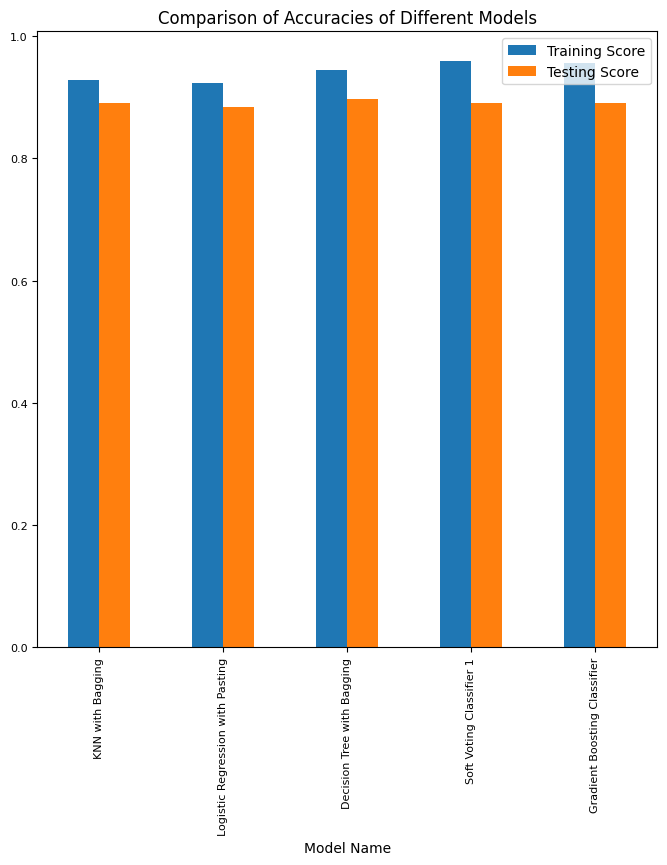

In [ ]:
import matplotlib.pyplot as plt

ax = best_models_df[['Training Score','Testing Score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Models", figsize=(8, 8), fontsize = 8)
plt.show()

# Prinsipal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [ ]:
print("Number of PCA components: ", pca.n_components_)

Number of PCA components:  6


## KNN with PCA

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[3, 4, 5, 6, 7, 8, 9, 10, 15]}

grid_knn_clf = GridSearchCV(knn, param_grid=param_grid, cv = 9, scoring='roc_auc')
grid_knn_clf.fit(X_train_reduced, y_train)

GridSearchCV(cv=9, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 15]},
             scoring='roc_auc')

In [ ]:
print("Best Parameters for KNN Classifier with PCA: ", grid_knn_clf.best_params_)

Best Parameters for KNN Classifier with PCA:  {'n_neighbors': 15}


In [ ]:
pca_knn = KNeighborsClassifier(**grid_knn_clf.best_params_)
pca_knn.fit(X_train_reduced, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
print("KNN Classifier with PCA Training Score: ", pca_knn.score(X_train_reduced, y_train))
print("KNN Classifier with PCA Testing Score: ", pca_knn.score(X_test_reduced, y_test))

KNN Classifier with PCA Training Score:  0.9209677419354839
KNN Classifier with PCA Testing Score:  0.8782051282051282


In [ ]:
pca_report_table_1 = ['KNN Classifier with PCA',
                      f"n_neighbors: {grid_knn_clf.best_params_['n_neighbors']}",
                      pca_knn.score(X_train_reduced, y_train), pca_knn.score(X_test_reduced, y_test)]

## Logistic Regression with PCA

In [ ]:
pca_lr = LogisticRegression(solver='liblinear', random_state=0)

param_grid = {'penalty': ['l1', 'l2']}

grid_log_clf = GridSearchCV(pca_lr, param_grid, cv=5, return_train_score=True, scoring='roc_auc')
grid_log_clf.fit(X_train_reduced, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'penalty': ['l1', 'l2']}, return_train_score=True,
             scoring='roc_auc')

In [ ]:
print("Best Parameters for Logistic Regression with PCA: ", grid_log_clf.best_params_)

Best Parameters for Logistic Regression with PCA:  {'penalty': 'l1'}


In [ ]:
pca_lr = LogisticRegression(**grid_log_clf.best_params_, solver='liblinear', random_state=0)
pca_lr.fit(X_train_reduced, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [ ]:
print("Logistic Regression with PCA Training Score: ", pca_lr.score(X_train_reduced, y_train))
print("Logistic Regression with PCA Testing Score: ", pca_lr.score(X_test_reduced, y_test))

Logistic Regression with PCA Training Score:  0.9080645161290323
Logistic Regression with PCA Testing Score:  0.8589743589743589


In [ ]:
pca_report_table_2 = ['Logistic Regression with PCA',
                      f"penalty: {grid_log_clf.best_params_['penalty']}",
                      pca_lr.score(X_train_reduced, y_train), pca_lr.score(X_test_reduced, y_test)]

## Decision Tree with PCA

In [ ]:
#Base model
dt = DecisionTreeClassifier(random_state = 0)

#model param
grid_param = {'max_depth': [3, 5, 7, 9, 11, 15]}

#grid model
dt_grid = GridSearchCV(dt, grid_param, cv = 5, n_jobs = -1)

#train grid model
dt_grid.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 15]})

In [ ]:
print("Best Parameters for Decision Tree Classifier: ", dt_grid.best_params_)

Best Parameters for Decision Tree Classifier:  {'max_depth': 3}


In [ ]:
pca_dt = DecisionTreeClassifier(**dt_grid.best_params_, random_state= 0)
pca_dt.fit(X_train_reduced, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
print("Decision Tree Classifier with PCA Training Score: ", pca_dt.score(X_train_reduced, y_train))
print("Decision Tree Classifier with PCA Testing Score: ", pca_dt.score(X_test_reduced, y_test))

Decision Tree Classifier with PCA Training Score:  0.9370967741935484
Decision Tree Classifier with PCA Testing Score:  0.8717948717948718


In [ ]:
pca_report_table_3 = [
    'Decision Tree Classifier with PCA',
    f"max_depth: {dt_grid.best_params_['max_depth']}",
    pca_dt.score(X_train_reduced, y_train),
    pca_dt.score(X_test_reduced, y_test)
]

## Generating Table Report with PCA

In [ ]:
pca_report_table = pd.DataFrame(list(zip(pca_report_table_1,
             pca_report_table_2,
             pca_report_table_3))).transpose()

# Simpan ke csv
pca_report_table.to_csv('report_table-with_PCA.csv', index=False)

In [ ]:
pca_report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score']
pca_report_table.index = pca_report_table['Model Name']
pca_report_table

,Model Name,Model Parameter,Training Score,Testing Score
Model Name,,,,
KNN Classifier with PCA,KNN Classifier with PCA,n_neighbors: 15,0.920968,0.878205
Logistic Regression with PCA,Logistic Regression with PCA,penalty: l1,0.908065,0.858974
Decision Tree Classifier with PCA,Decision Tree Classifier with PCA,max_depth: 3,0.937097,0.871795


In [ ]:
# Model tanpa PCA
best_models_df

,Model Name,Model Parameter,Training Score,Testing Score
Model Name,,,,
KNN with Bagging,KNN with Bagging,"n_neighbors: 3, max_samples: 1.0, n_estimators...",0.929032,0.891026
Logistic Regression with Pasting,Logistic Regression with Pasting,"C: 10, penalty: l1, max_samples: 0.1, n_estima...",0.922581,0.884615
Decision Tree with Bagging,Decision Tree with Bagging,"max_depth: 5, min_samples_split: 2, max_sample...",0.945161,0.897436
Soft Voting Classifier 1,Soft Voting Classifier 1,,0.959677,0.891026
Gradient Boosting Classifier,Gradient Boosting Classifier,"learning_rate: 0.01, max_depth = 5, n_estimato...",0.956452,0.891026


# Kesimpulan

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    print(f"\n=== {model_name} ===")
    print("Train Accuracy:", model.score(X_train, y_train))
    print("Test Accuracy:", model.score(X_test, y_test))
    print("Train Precision:", precision_score(y_train, y_train_pred))
    print("Test Precision:", precision_score(y_test, y_test_pred))
    print("Train Recall:", recall_score(y_train, y_train_pred))
    print("Test Recall:", recall_score(y_test, y_test_pred))
    print("Train F1 Score:", f1_score(y_train, y_train_pred))
    print("Test F1 Score:", f1_score(y_test, y_test_pred))
    if y_test_proba is not None:
        auc = roc_auc_score(y_test, y_test_proba)
        print("Test ROC AUC:", auc)
        fpr, tpr, _ = roc_curve(y_test, y_test_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()
    print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

In [ ]:
# Hard Voting Report
evaluate_model(voting_clf_hard, X_train, y_train, X_test, y_test, "Hard Voting Classifier")


=== Hard Voting Classifier ===
Train Accuracy: 0.932258064516129
Test Accuracy: 0.8846153846153846
Train Precision: 0.981042654028436
Test Precision: 0.92
Train Recall: 0.8448979591836735
Test Recall: 0.7666666666666667
Train F1 Score: 0.9078947368421053
Test F1 Score: 0.8363636363636363

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        96
           1       0.92      0.77      0.84        60

    accuracy                           0.88       156
   macro avg       0.89      0.86      0.87       156
weighted avg       0.89      0.88      0.88       156




=== Soft Voting Classifier ===
Train Accuracy: 0.9596774193548387
Test Accuracy: 0.8910256410256411
Train Precision: 0.9954954954954955
Test Precision: 0.9387755102040817
Train Recall: 0.9020408163265307
Test Recall: 0.7666666666666667
Train F1 Score: 0.9464668094218416
Test F1 Score: 0.8440366972477065
Test ROC AUC: 0.9095486111111108


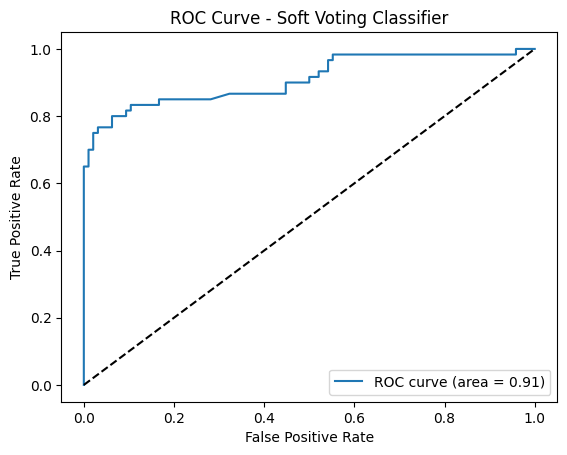


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.87      0.97      0.92        96
           1       0.94      0.77      0.84        60

    accuracy                           0.89       156
   macro avg       0.90      0.87      0.88       156
weighted avg       0.90      0.89      0.89       156



In [ ]:
# Soft Voting Report
evaluate_model(voting_clf_soft, X_train, y_train, X_test, y_test, "Soft Voting Classifier")


=== KNN with Bagging ===
Train Accuracy: 0.9290322580645162
Test Accuracy: 0.8910256410256411
Train Precision: 0.9950738916256158
Test Precision: 0.9574468085106383
Train Recall: 0.8244897959183674
Test Recall: 0.75
Train F1 Score: 0.9017857142857143
Test F1 Score: 0.8411214953271028
Test ROC AUC: 0.9081597222222222


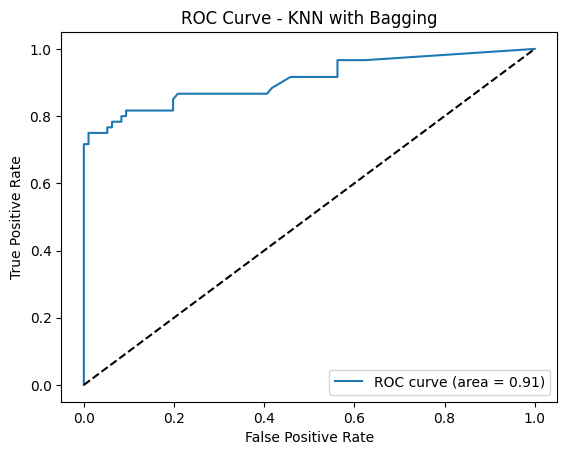


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.86      0.98      0.92        96
           1       0.96      0.75      0.84        60

    accuracy                           0.89       156
   macro avg       0.91      0.86      0.88       156
weighted avg       0.90      0.89      0.89       156



In [ ]:
# KNN with Bagging Report
evaluate_model(knn_bag, X_train, y_train, X_test, y_test, "KNN with Bagging")


=== Logistic Regression with Bagging ===
Train Accuracy: 0.9241935483870968
Test Accuracy: 0.8782051282051282
Train Precision: 0.9583333333333334
Test Precision: 0.8727272727272727
Train Recall: 0.8448979591836735
Test Recall: 0.8
Train F1 Score: 0.8980477223427332
Test F1 Score: 0.8347826086956521
Test ROC AUC: 0.9098958333333333


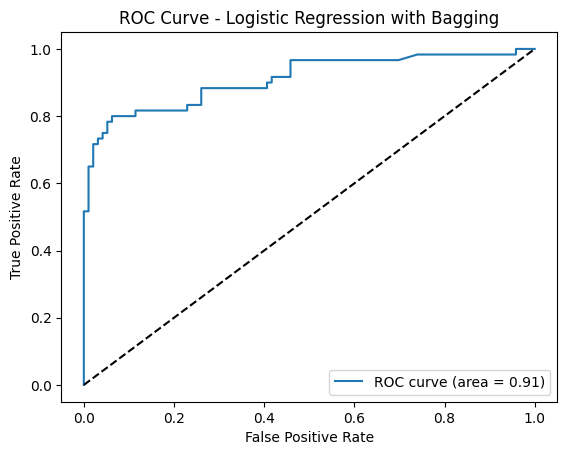


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        96
           1       0.87      0.80      0.83        60

    accuracy                           0.88       156
   macro avg       0.88      0.86      0.87       156
weighted avg       0.88      0.88      0.88       156



In [ ]:
# Logistic Regression with Bagging Report
evaluate_model(logreg_bag, X_train, y_train, X_test, y_test, "Logistic Regression with Bagging")


=== Decision Tree with Bagging ===
Train Accuracy: 0.9451612903225807
Test Accuracy: 0.8974358974358975
Train Precision: 0.9817351598173516
Test Precision: 0.9230769230769231
Train Recall: 0.8775510204081632
Test Recall: 0.8
Train F1 Score: 0.9267241379310345
Test F1 Score: 0.8571428571428571
Test ROC AUC: 0.9224826388888888


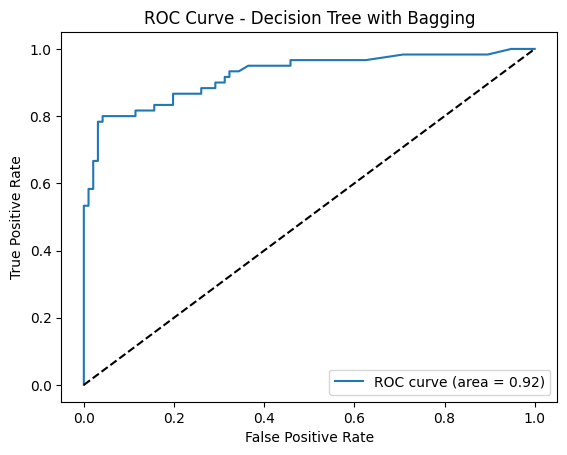


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        96
           1       0.92      0.80      0.86        60

    accuracy                           0.90       156
   macro avg       0.90      0.88      0.89       156
weighted avg       0.90      0.90      0.90       156



In [ ]:
# Decision Tree with Bagging Report
evaluate_model(dt_bag, X_train, y_train, X_test, y_test, "Decision Tree with Bagging")


=== KNN with Pasting ===
Train Accuracy: 0.9274193548387096
Test Accuracy: 0.8846153846153846
Train Precision: 0.9901960784313726
Test Precision: 0.9375
Train Recall: 0.8244897959183674
Test Recall: 0.75
Train F1 Score: 0.8997772828507795
Test F1 Score: 0.8333333333333334
Test ROC AUC: 0.8992187500000001


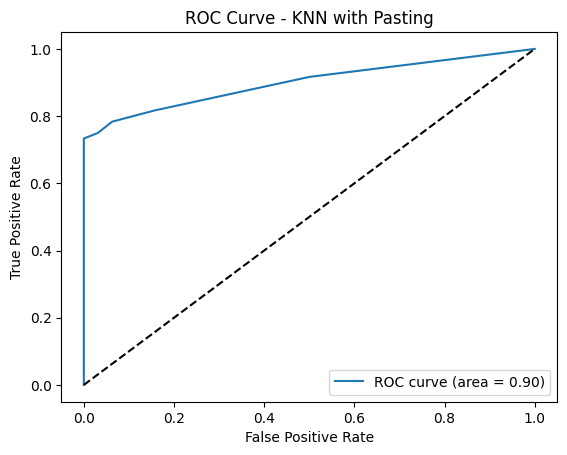


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        96
           1       0.94      0.75      0.83        60

    accuracy                           0.88       156
   macro avg       0.90      0.86      0.87       156
weighted avg       0.89      0.88      0.88       156



In [ ]:
# KNN with Pasting Report
evaluate_model(knn_pas, X_train, y_train, X_test, y_test, "KNN with Pasting")


=== Logistic Regression with Pasting ===
Train Accuracy: 0.9225806451612903
Test Accuracy: 0.8846153846153846
Train Precision: 0.9539170506912442
Test Precision: 0.8888888888888888
Train Recall: 0.8448979591836735
Test Recall: 0.8
Train F1 Score: 0.8961038961038961
Test F1 Score: 0.8421052631578947
Test ROC AUC: 0.9057291666666666


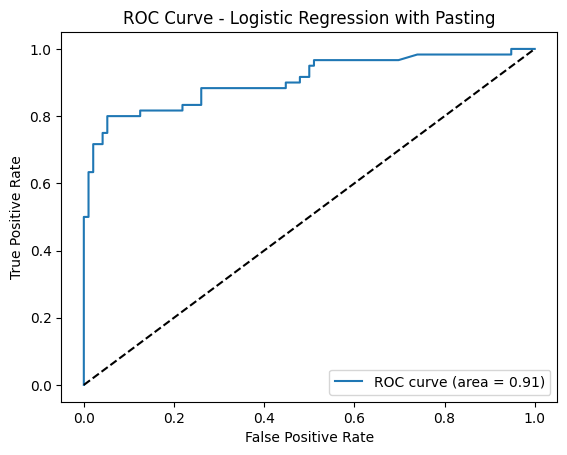


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        96
           1       0.89      0.80      0.84        60

    accuracy                           0.88       156
   macro avg       0.89      0.87      0.88       156
weighted avg       0.88      0.88      0.88       156



In [ ]:
# Logistic Regression with Pasting Report
evaluate_model(logreg_pas, X_train, y_train, X_test, y_test, "Logistic Regression with Pasting")


=== Decision Tree with Pasting ===
Train Accuracy: 0.9467741935483871
Test Accuracy: 0.8974358974358975
Train Precision: 0.9818181818181818
Test Precision: 0.9230769230769231
Train Recall: 0.8816326530612245
Test Recall: 0.8
Train F1 Score: 0.9290322580645162
Test F1 Score: 0.8571428571428571
Test ROC AUC: 0.9212673611111112


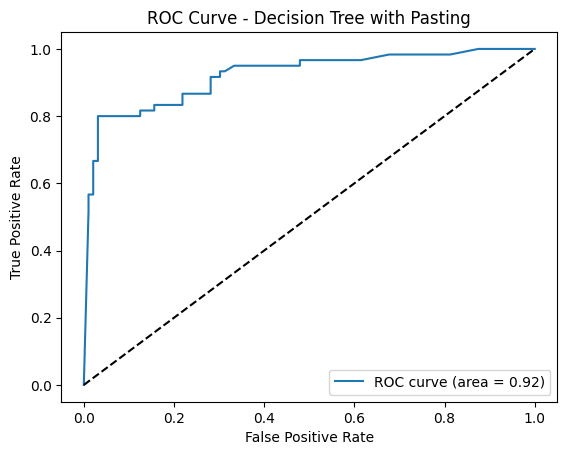


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        96
           1       0.92      0.80      0.86        60

    accuracy                           0.90       156
   macro avg       0.90      0.88      0.89       156
weighted avg       0.90      0.90      0.90       156



In [ ]:
# Decision Tree with Pasting Report
evaluate_model(dt_pas, X_train, y_train, X_test, y_test, "Decision Tree with Pasting")


=== Logistic Regression with Adaboost ===
Train Accuracy: 0.9016129032258065
Test Accuracy: 0.8653846153846154
Train Precision: 0.9380952380952381
Test Precision: 0.8679245283018868
Train Recall: 0.8040816326530612
Test Recall: 0.7666666666666667
Train F1 Score: 0.865934065934066
Test F1 Score: 0.8141592920353983
Test ROC AUC: 0.8663194444444444


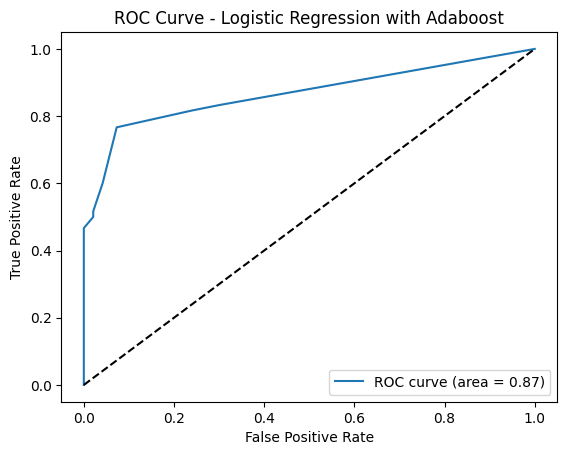


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        96
           1       0.87      0.77      0.81        60

    accuracy                           0.87       156
   macro avg       0.87      0.85      0.85       156
weighted avg       0.87      0.87      0.86       156



In [ ]:
# Logistic Regression with Adaboost Report
evaluate_model(logreg_ada, X_train, y_train, X_test, y_test, "Logistic Regression with Adaboost")


=== Decision Tree with Adaboost ===
Train Accuracy: 0.9580645161290322
Test Accuracy: 0.8846153846153846
Train Precision: 1.0
Test Precision: 0.92
Train Recall: 0.8938775510204081
Test Recall: 0.7666666666666667
Train F1 Score: 0.9439655172413793
Test F1 Score: 0.8363636363636363
Test ROC AUC: 0.8980902777777777


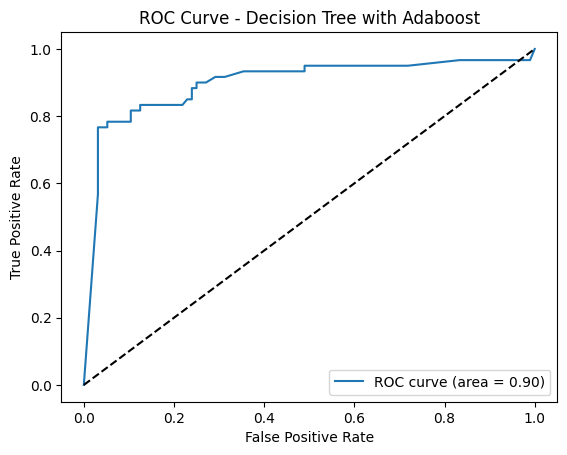


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        96
           1       0.92      0.77      0.84        60

    accuracy                           0.88       156
   macro avg       0.89      0.86      0.87       156
weighted avg       0.89      0.88      0.88       156



In [ ]:
# Decision Tree with Adaboost Report
evaluate_model(dt_ada, X_train, y_train, X_test, y_test, "Decision Tree with Adaboost")


=== Gradient Boosting Classifier ===
Train Accuracy: 0.9564516129032258
Test Accuracy: 0.8910256410256411
Train Precision: 1.0
Test Precision: 0.9387755102040817
Train Recall: 0.889795918367347
Test Recall: 0.7666666666666667
Train F1 Score: 0.9416846652267818
Test F1 Score: 0.8440366972477065
Test ROC AUC: 0.8966145833333333


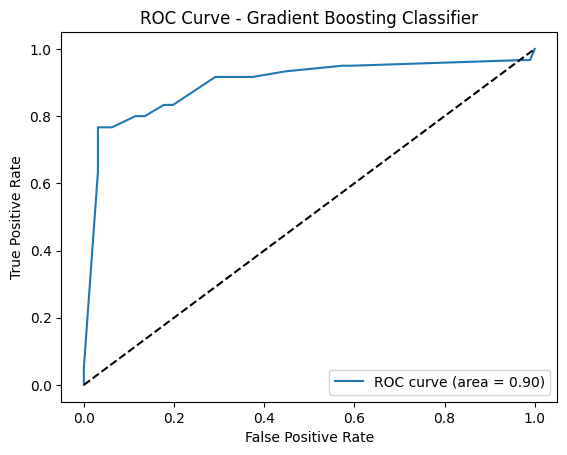


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.87      0.97      0.92        96
           1       0.94      0.77      0.84        60

    accuracy                           0.89       156
   macro avg       0.90      0.87      0.88       156
weighted avg       0.90      0.89      0.89       156



In [ ]:
# Gradient Boosting Report
evaluate_model(gb, X_train, y_train, X_test, y_test, "Gradient Boosting Classifier")


=== KNN with PCA ===
Train Accuracy: 0.9209677419354839
Test Accuracy: 0.8782051282051282
Train Precision: 0.9711538461538461
Test Precision: 0.9361702127659575
Train Recall: 0.8244897959183674
Test Recall: 0.7333333333333333
Train F1 Score: 0.891832229580574
Test F1 Score: 0.822429906542056
Test ROC AUC: 0.9273437499999999


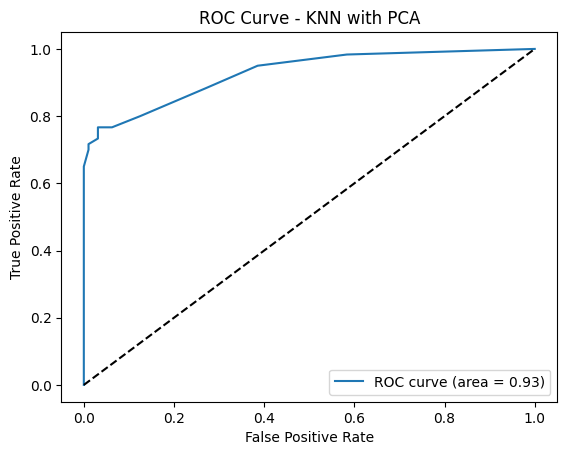


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.85      0.97      0.91        96
           1       0.94      0.73      0.82        60

    accuracy                           0.88       156
   macro avg       0.89      0.85      0.86       156
weighted avg       0.89      0.88      0.87       156



In [ ]:
# KNN with PCA Report
evaluate_model(pca_knn, X_train_reduced, y_train, X_test_reduced, y_test, "KNN with PCA")


=== Logistic Regression with PCA ===
Train Accuracy: 0.9080645161290323
Test Accuracy: 0.8589743589743589
Train Precision: 0.9433962264150944
Test Precision: 0.8518518518518519
Train Recall: 0.8163265306122449
Test Recall: 0.7666666666666667
Train F1 Score: 0.87527352297593
Test F1 Score: 0.8070175438596491
Test ROC AUC: 0.9100694444444445


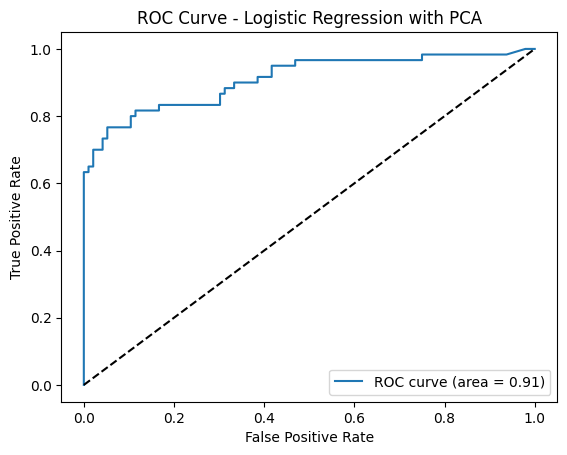


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        96
           1       0.85      0.77      0.81        60

    accuracy                           0.86       156
   macro avg       0.86      0.84      0.85       156
weighted avg       0.86      0.86      0.86       156



In [ ]:
# Logistic Regression with PCA Report
evaluate_model(pca_lr, X_train_reduced, y_train, X_test_reduced, y_test, "Logistic Regression with PCA")


=== Decision Tree with PCA ===
Train Accuracy: 0.9370967741935484
Test Accuracy: 0.8717948717948718
Train Precision: 0.9951923076923077
Test Precision: 0.9166666666666666
Train Recall: 0.8448979591836735
Test Recall: 0.7333333333333333
Train F1 Score: 0.9139072847682119
Test F1 Score: 0.8148148148148148
Test ROC AUC: 0.8447916666666667


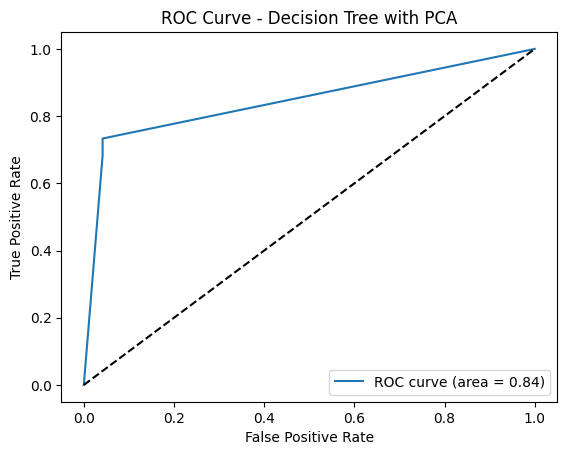


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        96
           1       0.92      0.73      0.81        60

    accuracy                           0.87       156
   macro avg       0.88      0.85      0.86       156
weighted avg       0.88      0.87      0.87       156



In [ ]:
# Decision Tree with PCA Report
evaluate_model(pca_dt, X_train_reduced, y_train, X_test_reduced, y_test, "Decision Tree with PCA")